### 1. Question and Answer (Q&A) System

### Introduction

>   Question and Answer (QA) systems have attracted significant attention in recent years due to their ability to automatically extract answers from text. These systems play a key role in various fields such as information retrieval, customer support, and virtual assistants.
>   
>   The goal of this exercise is to design and implement an extractive question answering system based on transformers that receives a text and a related question, and extracts the best appropriate answer from the text. Unlike generative QA systems that produce answers from scratch, extractive QA systems rely on information present in the context text to generate answers (as shown in Figure 1). Using the power of deep learning and pre-trained language models like BERT, these systems can effectively understand complex language structures, textual relationships, and semantic differences necessary for accurate answer extraction.
>   
```
Question: The New York Giants and the New York Jets play
at which stadium in NYC ?
Context: The city is represented in the National Football
League by the New York Giants and the New York Jets,
although both teams play their home games at MetLife
Stadium in nearby East Rutherford, New Jersey, which
hosted Super Bowl XLVIII in 2014.
```
>   Sample question and text pair with the answer marked in the text, taken from the SQuAD dataset
>   
>   In this exercise, you will enter the world of question and answer systems in Persian language by designing and implementing a BERT model on the PQuad dataset. This exercise includes data preprocessing, model design, exception management, and performance evaluation using Exact Match (EM) and F1 score metrics.

### 1-1. Paper Introduction (10 points)
>   To understand the functionality of the BERT transformer model, read the original BERT paper (Devlin et al., 2018) from [this link](https://aclanthology.org/N19-1423/) to understand the architecture, tasks, and objective functions on which BERT was pretrained. Explain the key components of the BERT model, including its transformer architecture, input representation, and pre-training objectives.

### 1-2. Data Preprocessing (30 points)

>   The dataset used in this exercise is the PQuad dataset, which is accessible through [this link](https://github.com/AUT-NLP/PQuAD). First, you need to display statistical information including number, type, and length of texts and questions of the dataset after placing them in a dataframe. This helps you ensure data quality and identify any illogical or missing data.
>   
>   Then implement the necessary preprocessing including Tokenization and Embedding of data for the task at hand.
#### 1-2-1. Tokenization

>   BERT uses tokens for text processing. This means that long texts are divided into smaller units called tokens. These tokens typically include words, symbols, and even parts of words. For BERT tokenization, you can use the specialized BERT tokenizer provided by libraries such as transformers. This tokenizer automatically converts inputs to BERT tokens. This tokenizer also simultaneously performs operations like Padding and Truncation to make the input size appropriate for the model.
#### 1-2-2. Embedding

>   Embeddings are processes that convert tokens into numerical vectors. These vectors represent the semantic and grammatical features of words and sentences. In BERT models, each word or token is converted into a numerical vector in the embedding space that represents the features of that word.
>   
>   BERT uses its own embeddings for each token, which include three main types:
>   
>   - Token Embeddings: which assigns a vector to each token.
>   - Segment Embeddings: to show the difference between two sections (text and question).
>   - Position Embeddings: to represent the position of each token in the text (i.e., first, second tokens...).
>   
>   These embeddings are used together in the BERT model for processing data and producing results. During tokenization, tokens are numerically input into the model. These tokens are then converted to numerical embeddings that include semantic information about each word and its position in the sentence.
#### 1-2-3. Input Management

>   For the BERT model, inputs must be divided into two main parts:
>   1. Question text: which must be input to the model.
>   2. Context text: which contains the text from which the model must extract the answer.
>   
>   In extractive models, the question and context text must be connected so that the model can find the best answer. This is usually done using a combination of question and context tokens.
>   
>   During preprocessing, the question and context text must be converted into a single token. The BERT model specifically uses separator tokens to separate the question from the context text.

#### 1-2-4. Creating Attention Mask

>   Attention mask is another important component in data processing that tells the model which parts of the inputs should be processed and which parts should be ignored. This mask is typically used for data with different lengths. Usually, BERT models use attention masks to prevent processing padding tokens.
#### 1-2-5. Batching

>   After completing all preprocessing steps, data must be divided into batches so that the model can process them simultaneously. This helps increase efficiency and typically uses a DataLoader in PyTorch or similar for this purpose.
>   
>   For train, validation, and test, use the data with the same names in the dataset.

#### 1-3. Model Implementation (50 points)

>   The general structure of a question and answer system includes inputs such as user questions and reference texts, which allow the model to extract relevant information. In this dataset, we have text, question, and answer. Outputs typically include generated answers and their validity score based on the answers we have.
>   
>   Models used typically include natural language processing models like BERT designed to understand text and identify relationships between questions and answers. Error functions like Cross-Entropy Loss and Mean Squared Error are used to train the model to learn question understanding, correct information extraction, and logical answer generation. Finally, the model's goal is to improve its ability to identify and produce accurate and relevant answers to questions.
>   
>   For implementation, use two models based on ParsBERT and ALBERT. Their pre-trained models are accessible on Huggingface from [this link](https://huggingface.co/HooshvareLab/bert-base-parsbert-uncased) and [this link](https://huggingface.co/m3hrdadfi/albert-fa-base-v2). ParsBERT has the same BERT model structure that has been trained on Persian texts. ALBERT is a transformer-based model built on the BERT architecture (a transformer-based model that uses bidirectional attention to analyze and contextually understand texts) and its pre-trained model on Persian data is accessible.
>   
>   Implement the designed network using one of these two models. Note that using the AutoModelForQuestionAnswering class is not permitted.

#### 1-4. Evaluation and Post-processing (20 points)

>   During the task execution by the model, exceptions occur during data loading, preprocessing, and post-processing due to the length of context texts and the input limitations of transformer models, which need to be managed. Ensure that your model can handle these exceptions and report them.
>   
>   After managing exceptions, evaluate your two trained models on the test dataset using two metrics, EM and F1-score, and compare your results with those mentioned in the paper. You can use ready-made tools for evaluation.

### Answer

#### The Transformer Architecture

BERT (Bidirectional Encoder Representations from Transformers) is built on an **encoder-only** transformer architecture. Unlike models that use encoder-decoder structures, BERT focuses exclusively on understanding and representing input sequences, making it well-suited for tasks like text classification, question answering, and language understanding.

The core innovation of BERT's transformer architecture lies in its self-attention mechanism:

- **Self-Attention**: Instead of processing words in sequence, each word in a sentence can directly **attend** to every other word, determining how much focus to place on each one when constructing its representation. This creates rich contextual embeddings.

- **Bidirectional Self-Attention**: Unlike unidirectional models like GPT, BERT's self-attention is bidirectional, allowing it to look both left and right with respect to any given token. This bidirectionality is crucial for BERT's understanding of context.

- **Multi-Head Attention**: BERT doesn't just use a single attention mechanism but employs multiple "heads" of attention. Each head can focus on different aspects of the relationships between words. For example, one head might focus on syntactic relationships while another captures semantic connections.

- **Layer Structure**: BERT stacks multiple transformer encoder blocks. Each block contains:
  * Multi-head self-attention layer
  * Feed-forward neural network
  * Layer normalization components
  * Residual connections (which help with gradient flow during training)

BERT's encoder stack has two main architectural parameters: L (the number of layers) and H (the hidden size). The BERT-base variant uses 12 such layers with 12 attention heads and 768 hidden dimensions, while BERT-large has 24 layers with 16 attention heads and 1024 hidden dimensions (340M parameters).

Unlike decoder models that generate output sequences autoregressively (one token at a time), BERT's encoder-only architecture processes all tokens simultaneously without causal masking. This design allows BERT to create deep contextual representations of text rather than to generate new text.

#### Input Representation

BERT combines three different types of information for each token:

1. **Token Embeddings**: These capture the semantic meaning of individual words or subwords. BERT uses WordPiece tokenization, breaking uncommon words into subword units. For example, "unaffordable" might become "un" + "afford" + "able".

2. **Position Embeddings**: Since transformers process all tokens in parallel, they lose the sequential information that RNNs naturally preserve. Position embeddings restore this information by explicitly encoding each token's position in the sequence. Unlike some other models that use sinusoidal functions, BERT uses learned position embeddings.

3. **Segment Embeddings**: These identify which segment of text a token belongs to. This is crucial for tasks like question answering or natural language inference. Tokens from the first sentence receive one segment embedding, while tokens from the second sentence receive another.

These three embeddings are summed element-wise to create the final representation for each token before feeding to the transformer layers.

#### Special Tokens and Their Functions

BERT employs several special tokens for different purposes:

- **[CLS]** (Classification Token): Always placed at the beginning of each input sequence. The final hidden state of this token is used as the aggregate sequence representation for classification tasks. It learns to capture the overall essence of the entire input.

- **[SEP]** (Separator Token): Used to separate different segments within an input sequence. For example, in a question-answering task, it separates the question from the context paragraph.

- **[MASK]** (Mask Token): Used as a placeholder during pre-training to replace tokens that the model needs to predict.

- **[PAD]** (Padding Token): Used to make all input sequences the same length within a batch, as required by the model architecture.

#### Pre-training Objectives

##### **Masked Language Modeling (MLM)**

MLM is an approach to bidirectional training:

1. The model takes a sentence and randomly masks 15% of the tokens.
2. Of these masked tokens:
   - 80% are replaced with the actual [MASK] token
   - 10% are replaced with a random token from the vocabulary
   - 10% are left unchanged

This variation prevents the model from simply memorizing which tokens were masked and forces it to maintain a strong representation for every input token.

The model's objective is to predict the original tokens at the masked positions based on its context. This requires understanding both the preceding and following context, leading to bidirectional learning.

##### **Next Sentence Prediction (NSP)**

While MLM focuses on word-level understanding, NSP targets sentence-level relationships:

1. The model is given pairs of sentences and must predict whether the second sentence actually follows the first in the original text.
2. During training, 50% of the pairs are consecutive sentences (labeled as "IsNext"), and 50% are random non-consecutive sentences (labeled as "NotNext").

This task helps BERT learn relationships between sentences, and learning cross-sentence reasoning.

### Prerequisits

In [ ]:
Here's the complete, debugged, and well-commented Persian QA system implementation:

```python
# ================================================================
# PERSIAN QUESTION ANSWERING SYSTEM - COMPLETE IMPLEMENTATION
# ================================================================

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import get_linear_schedule_with_warmup
from transformers import AutoTokenizer, AutoModel, AutoConfig
from pathlib import Path
from typing import Dict, List, Tuple, Optional, Union, Any
from collections import defaultdict, Counter
import warnings
import logging
import traceback
import time
import re
import requests

warnings.filterwarnings('ignore')

# ================================================================
# DATASET DOWNLOAD AND VALIDATION
# ================================================================

def download_pquad_dataset(data_directory="Dataset") -> bool:
    """
    Download PQuAD dataset files from GitHub repository.
    
    Args:
        data_directory: Directory to save dataset files
        
    Returns:
        bool: True if successful, False otherwise
    """
    # Create data directory if it doesn't exist
    Path(data_directory).mkdir(parents=True, exist_ok=True)
    
    # Define file URLs for downloading
    dataset_files = {
        "train.json": "https://raw.githubusercontent.com/AUT-NLP/PQuAD/main/Dataset/Train.json",
        "validation.json": "https://raw.githubusercontent.com/AUT-NLP/PQuAD/main/Dataset/Validation.json",
        "test.json": "https://raw.githubusercontent.com/AUT-NLP/PQuAD/main/Dataset/Test.json"
    }
    
    print("Downloading PQuAD dataset...")
    for filename, url in dataset_files.items():
        file_path = Path(data_directory) / filename
        
        # Skip if file already exists
        if file_path.exists():
            print(f"File {filename} already exists")
            continue
            
        try:
            print(f"Downloading {filename}...")
            response = requests.get(url, timeout=30)
            
            # Check if download was successful
            if not response.ok or 'html' in response.headers.get('content-type', ''):
                print(f"Failed to download {filename}")
                return False
            
            # Save file to disk
            with open(file_path, "wb") as file:
                file.write(response.content)
            print(f"Successfully downloaded {filename}")
            
        except Exception as error:
            print(f"Error downloading {filename}: {error}")
            return False
    
    print("Dataset download completed successfully!")
    return True

def load_json_file(file_path: str) -> Dict[str, Any]:
    """Load JSON file with error handling."""
    try:
        with open(file_path, encoding="utf-8") as file:
            return json.load(file)
    except Exception as error:
        print(f"Error loading {file_path}: {error}")
        return {}

def validate_pquad_structure(data: Dict[str, Any]) -> bool:
    """
    Validate PQuAD JSON structure.
    
    Args:
        data: Loaded JSON data
        
    Returns:
        bool: True if structure is valid
    """
    try:
        # Check hierarchical structure: data -> articles -> paragraphs -> questions
        sample_article = data["data"][0]
        sample_paragraph = sample_article["paragraphs"][0]
        sample_question = sample_paragraph["qas"][0]
        
        # Validate required fields at each level
        required_article_fields = ["title", "paragraphs"]
        required_paragraph_fields = ["context", "qas"]
        required_question_fields = ["id", "question"]
        
        # Check if all required fields exist
        return (all(field in sample_article for field in required_article_fields) and
                all(field in sample_paragraph for field in required_paragraph_fields) and
                all(field in sample_question for field in required_question_fields))
                
    except (KeyError, IndexError, TypeError):
        return False

# ================================================================
# ADVANCED DATASET ANALYZER
# ================================================================

class PersianQADatasetAnalyzer:
    """
    Comprehensive analyzer for PQuAD dataset with statistical analysis.
    Provides detailed insights into data distribution and quality metrics.
    """
    
    def __init__(self, data_directory: str = "Dataset"):
        self.data_directory = Path(data_directory)
        self.dataset_splits = {}  # Store loaded dataset splits
        self.analysis_statistics = {}  # Store computed statistics
        
    def load_and_validate_dataset(self) -> bool:
        """Load and validate all dataset splits."""
        required_files = {
            "train": "train.json",
            "validation": "validation.json", 
            "test": "test.json"
        }
        
        print("Loading and validating dataset...")
        for split_name, filename in required_files.items():
            file_path = self.data_directory / filename
            
            # Check if file exists
            if not file_path.exists():
                print(f"Missing file: {filename}")
                return False
                
            # Load and validate JSON structure
            data = load_json_file(str(file_path))
            if not data or not validate_pquad_structure(data):
                print(f"Invalid structure in {filename}")
                return False
                
            self.dataset_splits[split_name] = data
            print(f"Successfully loaded {filename}")
                
        return True
    
    def compute_comprehensive_statistics(self) -> pd.DataFrame:
        """Generate comprehensive statistics for all dataset splits."""
        all_statistics = []
        
        # Analyze each dataset split
        for split_name, data in self.dataset_splits.items():
            split_stats = self._analyze_single_split(split_name, data)
            all_statistics.append(split_stats)
            
        # Create comparison DataFrame
        statistics_dataframe = pd.DataFrame(all_statistics)
        statistics_dataframe.set_index('Split', inplace=True)
        
        return statistics_dataframe
    
    def _analyze_single_split(self, split_name: str, data: Dict) -> Dict:
        """Perform detailed analysis of a single data split."""
        # Initialize counters for different data elements
        articles = data.get("data", [])
        total_articles = len(articles)
        total_paragraphs = 0
        total_questions = 0
        answerable_questions = 0
        impossible_questions = 0
        
        # Lists to collect length statistics
        question_lengths = []
        context_lengths = []
        answer_lengths = []
        
        # Persian question type classification
        persian_question_types = {
            'چه': 0, 'چی': 0, 'چگونه': 0, 'چطور': 0,
            'کی': 0, 'کجا': 0, 'کدام': 0, 'چرا': 0,
            'آیا': 0, 'other': 0
        }
        
        # Process hierarchical structure: articles -> paragraphs -> questions
        for article in articles:
            for paragraph in article.get("paragraphs", []):
                total_paragraphs += 1
                context = paragraph["context"]
                context_lengths.append(len(context.split()))  # Count words
                
                for question_answer in paragraph.get("qas", []):
                    total_questions += 1
                    question = question_answer["question"]
                    question_lengths.append(len(question.split()))
                    
                    # Classify Persian question types
                    self._classify_persian_question_type(question, persian_question_types)
                    
                    # Handle answerable vs impossible questions
                    if question_answer.get("is_impossible", False):
                        impossible_questions += 1
                    else:
                        answerable_questions += 1
                        
                        # Extract answer statistics for answerable questions only
                        if question_answer.get("answers"):
                            answer = question_answer["answers"][0]
                            answer_text = answer["text"]
                            answer_lengths.append(len(answer_text.split()))
        
        # Calculate derived metrics
        avg_questions_per_paragraph = total_questions / total_paragraphs if total_paragraphs > 0 else 0
        answerable_ratio = answerable_questions / total_questions if total_questions > 0 else 0
        
        # Return comprehensive statistics dictionary
        return {
            'Split': split_name.capitalize(),
            'Articles': total_articles,
            'Paragraphs': total_paragraphs,
            'Questions': total_questions,
            'Answerable': answerable_questions,
            'Impossible': impossible_questions,
            'Answerable_Ratio': f"{answerable_ratio:.2%}",
            'Avg_Questions_Per_Paragraph': f"{avg_questions_per_paragraph:.1f}",
            'Avg_Question_Length': f"{np.mean(question_lengths):.1f}" if question_lengths else "0",
            'Avg_Context_Length': f"{np.mean(context_lengths):.1f}" if context_lengths else "0",
            'Avg_Answer_Length': f"{np.mean(answer_lengths):.1f}" if answer_lengths else "0",
            'Max_Context_Length': max(context_lengths) if context_lengths else 0,
            'Question_Types': persian_question_types
        }
    
    def _classify_persian_question_type(self, question: str, question_types: Dict):
        """Classify Persian question types based on interrogative words."""
        question_lower = question.lower().strip()
        
        # Persian question word classification
        if any(word in question_lower for word in ['چه ', 'چه‌']):
            question_types['چه'] += 1
        elif any(word in question_lower for word in ['چی ', 'چی‌']):
            question_types['چی'] += 1
        elif any(word in question_lower for word in ['چگونه', 'چطور']):
            question_types['چگونه'] += 1
        elif 'کی ' in question_lower or question_lower.startswith('کی'):
            question_types['کی'] += 1
        elif any(word in question_lower for word in ['کجا', 'کدام']):
            question_types['کجا'] += 1
        elif 'چرا' in question_lower:
            question_types['چرا'] += 1
        elif 'آیا' in question_lower:
            question_types['آیا'] += 1
        else:
            question_types['other'] += 1
    
    def create_comprehensive_visualizations(self):
        """Generate comprehensive visualizations for dataset analysis."""
        # Collect data for visualization from all splits
        all_question_lengths = []
        all_context_lengths = []
        all_answer_lengths = []
        
        for split_name, data in self.dataset_splits.items():
            question_lens, context_lens, answer_lens = self._extract_length_statistics(data)
            all_question_lengths.extend(question_lens)
            all_context_lengths.extend(context_lens)
            all_answer_lengths.extend(answer_lens)
        
        # Create comprehensive visualization grid
        figure, axes = plt.subplots(2, 3, figsize=(20, 12))
        figure.suptitle('PQuAD Dataset Comprehensive Analysis', fontsize=16, fontweight='bold')
        
        # 1. Question length distribution histogram
        axes[0, 0].hist(all_question_lengths, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, 0].set_title('Question Length Distribution (Words)', fontweight='bold')
        axes[0, 0].set_xlabel('Length (words)')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].axvline(np.mean(all_question_lengths), color='red', linestyle='--', 
                          label=f'Mean: {np.mean(all_question_lengths):.1f}')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Context length distribution histogram
        axes[0, 1].hist(all_context_lengths, bins=30, alpha=0.7, color='salmon', edgecolor='black')
        axes[0, 1].set_title('Context Length Distribution (Words)', fontweight='bold')
        axes[0, 1].set_xlabel('Length (words)')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].axvline(np.mean(all_context_lengths), color='red', linestyle='--',
                          label=f'Mean: {np.mean(all_context_lengths):.1f}')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Answer length distribution histogram
        axes[0, 2].hist(all_answer_lengths, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[0, 2].set_title('Answer Length Distribution (Words)', fontweight='bold')
        axes[0, 2].set_xlabel('Length (words)')
        axes[0, 2].set_ylabel('Frequency')
        axes[0, 2].axvline(np.mean(all_answer_lengths), color='red', linestyle='--',
                          label=f'Mean: {np.mean(all_answer_lengths):.1f}')
        axes[0, 2].legend()
        axes[0, 2].grid(True, alpha=0.3)
        
        # 4. Dataset split comparison bar chart
        split_data = []
        split_names = []
        for split_name, data in self.dataset_splits.items():
            articles_count = len(data.get("data", []))
            questions_count = sum(len(paragraph.get("qas", [])) 
                                for article in data.get("data", []) 
                                for paragraph in article.get("paragraphs", []))
            split_data.append([articles_count, questions_count])
            split_names.append(split_name.capitalize())
        
        split_array = np.array(split_data)
        x_positions = np.arange(len(split_names))
        bar_width = 0.35
        
        axes[1, 0].bar(x_positions - bar_width/2, split_array[:, 0], bar_width, label='Articles', alpha=0.8)
        axes[1, 0].bar(x_positions + bar_width/2, split_array[:, 1], bar_width, label='Questions', alpha=0.8)
        axes[1, 0].set_title('Dataset Split Comparison', fontweight='bold')
        axes[1, 0].set_xlabel('Dataset Split')
        axes[1, 0].set_ylabel('Count')
        axes[1, 0].set_xticks(x_positions)
        axes[1, 0].set_xticklabels(split_names)
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # 5. Question type distribution pie chart (using train split)
        if 'train' in self.dataset_splits:
            question_types = self._get_question_type_distribution(self.dataset_splits['train'])
            type_labels = list(question_types.keys())
            type_counts = list(question_types.values())
            
            axes[1, 1].pie(type_counts, labels=type_labels, autopct='%1.1f%%', startangle=90)
            axes[1, 1].set_title('Question Type Distribution', fontweight='bold')
        
        # 6. Length correlation scatter plot
        if len(all_question_lengths) == len(all_context_lengths):
            sample_size = min(1000, len(all_question_lengths))  # Limit for performance
            axes[1, 2].scatter(all_question_lengths[:sample_size], all_context_lengths[:sample_size], alpha=0.5)
            axes[1, 2].set_title('Question vs Context Length Correlation', fontweight='bold')
            axes[1, 2].set_xlabel('Question Length (words)')
            axes[1, 2].set_ylabel('Context Length (words)')
            axes[1, 2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def _extract_length_statistics(self, data: Dict) -> Tuple[List[int], List[int], List[int]]:
        """Extract length statistics from data split."""
        question_lengths = []
        context_lengths = []
        answer_lengths = []
        
        # Process each article in the data
        for article in data.get("data", []):
            for paragraph in article.get("paragraphs", []):
                context_lengths.append(len(paragraph["context"].split()))
                
                for question_answer in paragraph.get("qas", []):
                    question_lengths.append(len(question_answer["question"].split()))
                    
                    # Only count answer lengths for answerable questions
                    if not question_answer.get("is_impossible", False) and question_answer.get("answers"):
                        answer_lengths.append(len(question_answer["answers"][0]["text"].split()))
        
        return question_lengths, context_lengths, answer_lengths
    
    def _get_question_type_distribution(self, data: Dict) -> Dict[str, int]:
        """Get question type distribution for visualization."""
        question_types = {
            'چه/چی': 0, 'چگونه/چطور': 0, 'کی': 0, 
            'کجا/کدام': 0, 'چرا': 0, 'آیا': 0, 'سایر': 0
        }
        
        # Process all questions in the dataset
        for article in data.get("data", []):
            for paragraph in article.get("paragraphs", []):
                for question_answer in paragraph.get("qas", []):
                    question = question_answer["question"].lower()
                    
                    # Classify Persian question types
                    if any(word in question for word in ['چه ', 'چی ']):
                        question_types['چه/چی'] += 1
                    elif any(word in question for word in ['چگونه', 'چطور']):
                        question_types['چگونه/چطور'] += 1
                    elif 'کی ' in question:
                        question_types['کی'] += 1
                    elif any(word in question for word in ['کجا', 'کدام']):
                        question_types['کجا/کدام'] += 1
                    elif 'چرا' in question:
                        question_types['چرا'] += 1
                    elif 'آیا' in question:
                        question_types['آیا'] += 1
                    else:
                        question_types['سایر'] += 1
        
        return question_types

# ================================================================
# ADVANCED PERSIAN TOKENIZER
# ================================================================

class AdvancedPersianTokenizer:
    """
    Sophisticated tokenizer optimized for Persian text processing.
    Handles complex Persian morphology, punctuation, and BERT input formatting.
    """
    
    def __init__(self, 
                 model_name: str = "HooshvareLab/bert-base-parsbert-uncased",
                 max_sequence_length: int = 512,
                 document_stride: int = 128):
        """
        Initialize advanced Persian tokenizer.
        
        Args:
            model_name: Pre-trained model identifier
            max_sequence_length: Maximum sequence length
            document_stride: Sliding window stride for long contexts
        """
        print(f"Initializing tokenizer: {model_name}")
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.max_sequence_length = max_sequence_length
        self.document_stride = document_stride
        
        # Persian-specific character mappings for normalization
        self.persian_digits_mapping = str.maketrans('۰۱۲۳۴۵۶۷۸۹', '0123456789')
        self.arabic_chars_mapping = str.maketrans('ك', 'ک')  # Normalize Arabic Kaf to Persian
        
        # Ensure special tokens are properly configured
        self._setup_special_tokens()
        print("Tokenizer initialized successfully")
    
    def _setup_special_tokens(self):
        """Setup and validate special tokens for BERT."""
        special_tokens = {
            "pad_token": "[PAD]",
            "unk_token": "[UNK]",
            "cls_token": "[CLS]",
            "sep_token": "[SEP]",
            "mask_token": "[MASK]"
        }
        
        # Add missing special tokens if they don't exist
        tokens_to_add = {}
        for key, token in special_tokens.items():
            if getattr(self.tokenizer, key) is None:
                tokens_to_add[key] = token
        
        if tokens_to_add:
            self.tokenizer.add_special_tokens(tokens_to_add)
            print(f"Added special tokens: {list(tokens_to_add.keys())}")
    
    def normalize_persian_text(self, text: str) -> str:
        """
        Comprehensive Persian text normalization.
        
        Args:
            text: Raw Persian text
            
        Returns:
            Normalized Persian text
        """
        if not text:
            return ""
        
        # Normalize Persian and Arabic digits to English digits
        text = text.translate(self.persian_digits_mapping)
        
        # Normalize Arabic characters to Persian equivalents
        text = text.translate(self.arabic_chars_mapping)
        
        # Remove zero-width characters that can cause tokenization issues
        text = re.sub(r'[\u200c\u200d]', '', text)  # Remove ZWNJ and ZWJ
        
        # Normalize multiple consecutive spaces to single space
        text = re.sub(r'\s+', ' ', text)
        
        # Normalize punctuation spacing
        text = re.sub(r'\s*([.!?،؛:])\s*', r'\1 ', text)
        
        return text.strip()
    
    def tokenize_question_answer_pair(self,
                                    question: str,
                                    context: str,
                                    answer_start_position: Optional[int] = None,
                                    answer_text: Optional[str] = None) -> Dict[str, torch.Tensor]:
        """
        Advanced tokenization for question-answer pairs.
        
        Args:
            question: Question text
            context: Context containing the answer
            answer_start_position: Character position where answer starts
            answer_text: Answer text for position mapping
            
        Returns:
            Dictionary containing tokenized inputs and position mappings
        """
        # Normalize inputs for consistent processing
        question = self.normalize_persian_text(question)
        context = self.normalize_persian_text(context)
        
        # Tokenize with comprehensive parameters
        encoding = self.tokenizer(
            question,
            context,
            add_special_tokens=True,  # Add [CLS] and [SEP] tokens
            max_length=self.max_sequence_length,
            padding='max_length',  # Pad to max_length
            truncation=True,  # Truncate if too long
            return_tensors='pt',  # Return PyTorch tensors
            return_offsets_mapping=True,  # For answer position mapping
            return_attention_mask=True,  # For masking padded tokens
            return_token_type_ids=True  # For segment embeddings
        )
        
        # Initialize position tensors for answer spans
        start_positions = torch.zeros(1, dtype=torch.long)
        end_positions = torch.zeros(1, dtype=torch.long)
        
        # Map answer positions if provided
        if answer_start_position is not None and answer_text is not None:
            start_pos, end_pos = self._map_answer_positions(
                encoding['offset_mapping'][0],
                answer_start_position,
                answer_text,
                len(question)
            )
            start_positions[0] = start_pos
            end_positions[0] = end_pos
        
        return {
            'input_ids': encoding['input_ids'],
            'attention_mask': encoding['attention_mask'],
            'token_type_ids': encoding['token_type_ids'],
            'start_positions': start_positions,
            'end_positions': end_positions,
            'offset_mapping': encoding['offset_mapping']
        }
    
    def _map_answer_positions(self,
                             offset_mapping: torch.Tensor,
                             answer_start_position: int,
                             answer_text: str,
                             question_length: int) -> Tuple[int, int]:
        """
        Map character-level answer positions to token-level positions.
        
        Args:
            offset_mapping: Token-to-character offset mapping
            answer_start_position: Character start position in original context
            answer_text: Answer text
            question_length: Length of question for offset calculation
            
        Returns:
            Tuple of (start_token_position, end_token_position)
        """
        # Adjust for question prefix in the combined input
        # Format: [CLS] question [SEP] context [SEP]
        adjusted_answer_start = answer_start_position + question_length + 1  # +1 for [SEP]
        answer_end = adjusted_answer_start + len(answer_text)
        
        start_position = 0
        end_position = 0
        
        # Find tokens containing the answer span
        for token_index, (start_offset, end_offset) in enumerate(offset_mapping):
            # Skip special tokens (marked with (0, 0))
            if start_offset == 0 and end_offset == 0:
                continue
            
            # Find start token
            if start_offset  str:
        """
        Decode answer from token positions with Persian text post-processing.
        
        Args:
            input_ids: Input token IDs
            start_position: Start token position
            end_position: End token position
            
        Returns:
            Decoded answer text
        """
        # Validate positions
        if start_position >= end_position or start_position >= len(input_ids):
            return ""
        
        # Extract answer tokens
        answer_tokens = input_ids[start_position:end_position + 1]
        
        # Decode to text
        answer_text = self.tokenizer.decode(answer_tokens, skip_special_tokens=True)
        
        # Post-process Persian text
        answer_text = self.normalize_persian_text(answer_text)
        
        return answer_text.strip()

# ================================================================
# COMPREHENSIVE EMBEDDING MANAGER
# ================================================================

class ComprehensiveEmbeddingManager:
    """
    Advanced embedding manager for BERT's three embedding types.
    Handles token, segment, and position embeddings with analysis capabilities.
    """
    
    def __init__(self, tokenizer: AdvancedPersianTokenizer, device: str = 'cuda'):
        self.tokenizer = tokenizer
        self.device = device if torch.cuda.is_available() else 'cpu'
        self.embedding_statistics = {}
        print(f"Embedding manager initialized on device: {self.device}")
        
    def create_comprehensive_embeddings(self, 
                                      tokenized_inputs: Dict[str, torch.Tensor]) -> Dict[str, torch.Tensor]:
        """
        Create and analyze all three BERT embedding types.
        
        Args:
            tokenized_inputs: Output from tokenizer
            
        Returns:
            Dictionary containing all embedding components and metadata
        """
        batch_size, sequence_length = tokenized_inputs['input_ids'].shape
        
        # 1. Token Embeddings (Vocabulary-based)
        # These represent the semantic meaning of each token
        token_embeddings = tokenized_inputs['input_ids']
        
        # 2. Segment Embeddings (Question vs Context distinction)
        # 0 for question tokens, 1 for context tokens
        segment_embeddings = tokenized_inputs.get('token_type_ids', 
                                                 torch.zeros_like(token_embeddings))
        
        # 3. Position Embeddings (Sequential position information)
        # Restore sequential information lost in parallel processing
        position_embeddings = torch.arange(sequence_length, device=self.device).unsqueeze(0).expand(batch_size, -1)
        
        # 4. Attention Mask (Valid token identification)
        # 1 for real tokens, 0 for padding tokens
        attention_mask = tokenized_inputs['attention_mask']
        
        # Comprehensive embedding analysis
        embedding_analysis = self._analyze_embeddings(
            token_embeddings, segment_embeddings, position_embeddings, attention_mask
        )
        
        return {
            'token_embeddings': token_embeddings,
            'segment_embeddings': segment_embeddings, 
            'position_embeddings': position_embeddings,
            'attention_mask': attention_mask,
            'embedding_analysis': embedding_analysis,
            'sequence_length': sequence_length,
            'batch_size': batch_size
        }
    
    def _analyze_embeddings(self, 
                           token_embeddings: torch.Tensor,
                           segment_embeddings: torch.Tensor, 
                           position_embeddings: torch.Tensor,
                           attention_mask: torch.Tensor) -> Dict[str, any]:
        """Comprehensive embedding analysis for optimization insights."""
        
        # Calculate effective sequence lengths (excluding padding)
        effective_lengths = attention_mask.sum(dim=1)
        
        # Analyze segment distribution (question vs context tokens)
        segment_distribution = {}
        for batch_index in range(segment_embeddings.shape[0]):
            mask = attention_mask[batch_index].bool()
            segments = segment_embeddings[batch_index][mask]
            
            unique_segments, counts = torch.unique(segments, return_counts=True)
            segment_distribution[batch_index] = {
                'question_tokens': counts[0].item() if len(counts) > 0 else 0,
                'context_tokens': counts[1].item() if len(counts) > 1 else 0
            }
        
        # Token vocabulary utilization analysis
        vocabulary_size_used = len(torch.unique(token_embeddings[attention_mask.bool()]))
        
        return {
            'avg_sequence_length': effective_lengths.float().mean().item(),
            'max_sequence_length': effective_lengths.max().item(),
            'min_sequence_length': effective_lengths.min().item(),
            'padding_ratio': 1 - (effective_lengths.float().mean() / token_embeddings.shape[1]),
            'vocabulary_utilization': vocabulary_size_used,
            'segment_distribution': segment_distribution
        }

# ================================================================
# PRODUCTION DATASET AND DATALOADER
# ================================================================

# Configure comprehensive logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('pquad_preprocessing.log'),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

class ProductionPersianQADataset(Dataset):
    """
    Production-ready PQuAD dataset with comprehensive error handling,
    memory optimization, and performance monitoring.
    """
    
    def __init__(self,
                 data_file_path: str,
                 tokenizer: AdvancedPersianTokenizer,
                 embedding_manager: ComprehensiveEmbeddingManager,
                 max_sequence_length: int = 512,
                 enable_caching: bool = True,
                 validate_data_integrity: bool = True):
        """
        Initialize production dataset.
        
        Args:
            data_file_path: Path to PQuAD JSON file
            tokenizer: Advanced Persian tokenizer instance
            embedding_manager: Embedding manager instance
            max_sequence_length: Maximum sequence length
            enable_caching: Whether to cache tokenized samples
            validate_data_integrity: Whether to validate data integrity
        """
        self.data_file_path = Path(data_file_path)
        self.tokenizer = tokenizer
        self.embedding_manager = embedding_manager
        self.max_sequence_length = max_sequence_length
        self.enable_caching = enable_caching
        
        # Performance monitoring variables
        self.load_start_time = time.time()
        self.processing_times = []
        self.error_count = 0
        self.cache_hits = 0
        
        # Initialize cache if enabled
        self.tokenized_cache = {} if enable_caching else None
        
        # Load and process data
        logger.info(f"Loading dataset from {self.data_file_path}")
        self.samples = self._load_and_process_data(validate_data_integrity)
        
        # Log loading statistics
        load_time = time.time() - self.load_start_time
        logger.info(f"Dataset loaded successfully in {load_time:.2f}s")
        logger.info(f"Total samples: {len(self.samples)}")
        logger.info(f"Error count: {self.error_count}")
        
    def _load_and_process_data(self, validate_data_integrity: bool) -> List[Dict]:
        """Load and process PQuAD data with comprehensive validation."""
        
        # Load JSON data with error handling
        try:
            with open(self.data_file_path, 'r', encoding='utf-8') as file:
                data = json.load(file)
        except Exception as error:
            logger.error(f"Failed to load {self.data_file_path}: {error}")
            raise
        
        # Validate structure if requested
        if validate_data_integrity and not validate_pquad_structure(data):
            raise ValueError(f"Invalid data structure in {self.data_file_path}")
        
        samples = []
        processing_statistics = defaultdict(int)
        
        # Process hierarchical structure: articles -> paragraphs -> questions
        for article_index, article in enumerate(data.get("data", [])):
            try:
                for paragraph_index, paragraph in enumerate(article.get("paragraphs", [])):
                    context = paragraph["context"]
                    
                    # Validate context
                    if not context or len(context.strip()) == 0:
                        processing_statistics['empty_context'] += 1
                        continue
                    
                    for qa_index, question_answer in enumerate(paragraph.get("qas", [])):
                        try:
                            sample = self._process_question_answer_sample(
                                question_answer, context, article_index, paragraph_index, qa_index
                            )
                            if sample:
                                samples.append(sample)
                                processing_statistics['successful'] += 1
                            else:
                                processing_statistics['failed_processing'] += 1
                                
                        except Exception as error:
                            logger.warning(f"Error processing QA {question_answer.get('id', 'unknown')}: {error}")
                            processing_statistics['qa_errors'] += 1
                            self.error_count += 1
                            
            except Exception as error:
                logger.warning(f"Error processing article {article_index}: {error}")
                processing_statistics['article_errors'] += 1
                self.error_count += 1
        
        # Log processing statistics
        logger.info("Processing statistics:")
        for statistic, count in processing_statistics.items():
            logger.info(f"  {statistic}: {count}")
        
        return samples
    
    def _process_question_answer_sample(self, question_answer: Dict, context: str, 
                                      article_index: int, paragraph_index: int, qa_index: int) -> Optional[Dict]:
        """Process individual QA sample with comprehensive error handling."""
        
        try:
            # Extract basic information
            qa_id = question_answer.get('id', f"art{article_index}_par{paragraph_index}_qa{qa_index}")
            question = question_answer.get('question', '').strip()
            is_impossible = question_answer.get('is_impossible', False)
            
            # Validate question
            if not question:
                logger.warning(f"Empty question in {qa_id}")
                return None
            
            # Initialize sample dictionary
            sample = {
                'id': qa_id,
                'question': question,
                'context': context,
                'is_impossible': is_impossible,
                'article_index': article_index,
                'paragraph_index': paragraph_index,
                'qa_index': qa_index
            }
            
            # Process answer information for answerable questions
            if not is_impossible and question_answer.get('answers'):
                answer = question_answer['answers'][0]
                answer_text = answer.get('text', '').strip()
                answer_start = answer.get('answer_start', 0)
                
                # Validate answer
                if not answer_text:
                    logger.warning(f"Empty answer text in {qa_id}")
                    return None
                
                # Verify answer position
                if answer_start = len(context):
                    logger.warning(f"Invalid answer position in {qa_id}")
                    return None
                
                # Verify answer text matches context at given position
                context_answer = context[answer_start:answer_start + len(answer_text)]
                if context_answer != answer_text:
                    # Try to find correct position
                    correct_start = context.find(answer_text)
                    if correct_start != -1:
                        answer_start = correct_start
                        logger.info(f"Corrected answer position for {qa_id}")
                    else:
                        logger.warning(f"Answer text not found in context for {qa_id}")
                        return None
                
                sample.update({
                    'answer_text': answer_text,
                    'answer_start': answer_start
                })
            else:
                # Set default values for impossible questions
                sample.update({
                    'answer_text': '',
                    'answer_start': 0
                })
            
            return sample
            
        except Exception as error:
            logger.error(f"Error processing QA sample: {error}")
            return None
    
    def __len__(self) -> int:
        """Return dataset size."""
        return len(self.samples)
    
    def __getitem__(self, index: int) -> Dict[str, torch.Tensor]:
        """
        Get processed sample with comprehensive error handling and caching.
        
        Args:
            index: Sample index
            
        Returns:
            Dictionary containing processed sample
        """
        start_time = time.time()
        
        try:
            # Check cache first for performance
            if self.tokenized_cache is not None and index in self.tokenized_cache:
                self.cache_hits += 1
                return self.tokenized_cache[index]
            
            sample = self.samples[index]
            
            # Tokenize with advanced error handling
            try:
                tokenized = self.tokenizer.tokenize_question_answer_pair(
                    question=sample['question'],
                    context=sample['context'],
                    answer_start_position=sample.get('answer_start'),
                    answer_text=sample.get('answer_text')
                )
            except Exception as error:
                logger.warning(f"Tokenization failed for sample {index}: {error}")
                # Return fallback tensors
                tokenized = self._create_fallback_tensors()
            
            # Create comprehensive embeddings
            try:
                embeddings = self.embedding_manager.create_comprehensive_embeddings(tokenized)
            except Exception as error:
                logger.warning(f"Embedding creation failed for sample {index}: {error}")
                embeddings = {'embedding_analysis': {}}
            
            # Prepare final result
            result = {
                'input_ids': tokenized['input_ids'].squeeze(0),
                'attention_mask': tokenized['attention_mask'].squeeze(0),
                'token_type_ids': tokenized.get('token_type_ids', 
                    torch.zeros_like(tokenized['input_ids'])).squeeze(0),
                'start_positions': tokenized['start_positions'].squeeze(0),
                'end_positions': tokenized['end_positions'].squeeze(0),
                'is_impossible': torch.tensor(sample['is_impossible'], dtype=torch.long),
                'sample_id': sample['id']
            }
            
            # Cache result if caching is enabled
            if self.tokenized_cache is not None:
                self.tokenized_cache[index] = result
            
            # Record processing time for performance monitoring
            processing_time = time.time() - start_time
            self.processing_times.append(processing_time)
            
            return result
            
        except Exception as error:
            logger.error(f"Critical error processing sample {index}: {error}")
            self.error_count += 1
            return self._create_fallback_tensors()
    
    def _create_fallback_tensors(self) -> Dict[str, torch.Tensor]:
        """Create fallback tensors for error cases."""
        return {
            'input_ids': torch.zeros(self.max_sequence_length, dtype=torch.long),
            'attention_mask': torch.zeros(self.max_sequence_length, dtype=torch.long),
            'token_type_ids': torch.zeros(self.max_sequence_length, dtype=torch.long),
            'start_positions': torch.tensor(0, dtype=torch.long),
            'end_positions': torch.tensor(0, dtype=torch.long),
            'is_impossible': torch.tensor(1, dtype=torch.long),  # Mark as impossible
            'sample_id': 'fallback'
        }
    
    def get_performance_statistics(self) -> Dict[str, float]:
        """Get comprehensive performance statistics."""
        if not self.processing_times:
            return {}
        
        return {
            'avg_processing_time': np.mean(self.processing_times),
            'max_processing_time': max(self.processing_times),
            'min_processing_time': min(self.processing_times),
            'total_processing_time': sum(self.processing_times),
            'cache_hit_rate': self.cache_hits / len(self.samples) if self.samples else 0,
            'error_rate': self.error_count / len(self.samples) if self.samples else 0,
            'samples_processed': len(self.processing_times)
        }

def create_production_dataloaders(
    train_file_path: str,
    validation_file_path: str,
    test_file_path: str,
    tokenizer: AdvancedPersianTokenizer,
    embedding_manager: ComprehensiveEmbeddingManager,
    batch_size: int = 16,
    num_workers: int = 4,
    pin_memory: bool = True
) -> Tuple[DataLoader, DataLoader, DataLoader]:
    """
    Create production-ready DataLoaders with comprehensive configuration.
    
    Args:
        train_file_path: Training data file path
        validation_file_path: Validation data file path
        test_file_path: Test data file path
        tokenizer: Advanced tokenizer instance
        embedding_manager: Embedding manager instance
        batch_size: Batch size for all loaders
        num_workers: Number of worker processes
        pin_memory: Whether to pin memory for faster GPU transfer
        
    Returns:
        Tuple of (train_loader, validation_loader, test_loader)
    """
    
    logger.info("Creating production datasets...")
    
    # Create datasets with different configurations
    train_dataset = ProductionPersianQADataset(
        train_file_path, tokenizer, embedding_manager,
        enable_caching=True,  # Cache training data for speed
        validate_data_integrity=True
    )
    
    validation_dataset = ProductionPersianQADataset(
        validation_file_path, tokenizer, embedding_manager,
        enable_caching=True,  # Cache validation data
        validate_data_integrity=True
    )
    
    test_dataset = ProductionPersianQADataset(
        test_file_path, tokenizer, embedding_manager,
        enable_caching=False,  # Don't cache test data to save memory
        validate_data_integrity=True
    )
    
    # Create optimized DataLoaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,  # Shuffle training data
        num_workers=num_workers,
        pin_memory=pin_memory,
        drop_last=True,  # Drop incomplete batches for consistent training
        persistent_workers=True if num_workers > 0 else False
    )
    
    validation_loader = DataLoader(
        validation_dataset,
        batch_size=batch_size,
        shuffle=False,  # Don't shuffle validation data
        num_workers=num_workers,
        pin_memory=pin_memory,
        drop_last=False,
        persistent_workers=True if num_workers > 0 else False
    )
    
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,  # Don't shuffle test data
        num_workers=num_workers,
        pin_memory=pin_memory,
        drop_last=False,
        persistent_workers=True if num_workers > 0 else False
    )
    
    # Log DataLoader statistics
    logger.info("DataLoader creation completed:")
    logger.info(f"  Training batches: {len(train_loader)}")
    logger.info(f"  Validation batches: {len(validation_loader)}")
    logger.info(f"  Test batches: {len(test_loader)}")
    logger.info(f"  Batch size: {batch_size}")
    logger.info(f"  Number of workers: {num_workers}")
    
    return train_loader, validation_loader, test_loader

# ================================================================
# ADVANCED QA MODELS (PARSBERT AND ALBERT)
# ================================================================

class ParsBERTQuestionAnswering(nn.Module):
    """
    Advanced Question Answering model based on ParsBERT.
    Supports both span prediction and impossible question classification.
    """
    
    def __init__(self, 
                 model_name="HooshvareLab/bert-base-parsbert-uncased", 
                 dropout_rate=0.1):
        super(ParsBERTQuestionAnswering, self).__init__()
        
        print(f"Initializing ParsBERT QA model: {model_name}")
        
        # Load pre-trained ParsBERT with configuration
        self.config = AutoConfig.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name, config=self.config)
        
        # QA head for span prediction (start and end positions)
        self.question_answering_outputs = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(self.config.hidden_size, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(dropout_rate / 2),
            nn.Linear(512, 2)  # Start and end positions
        )
        
        # Classifier for impossible question detection
        self.impossible_question_classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(self.config.hidden_size, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(dropout_rate / 2),
            nn.Linear(256, 2)  # Answerable vs impossible
        )
        
        # Initialize weights properly
        self._initialize_weights()
        print("ParsBERT QA model initialized successfully")
        
    def _initialize_weights(self):
        """Initialize weights using Xavier uniform with proper scaling."""
        for module in [self.question_answering_outputs, self.impossible_question_classifier]:
            for layer in module:
                if isinstance(layer, nn.Linear):
                    nn.init.xavier_uniform_(layer.weight, gain=nn.init.calculate_gain('relu'))
                    if layer.bias is not None:
                        nn.init.zeros_(layer.bias)
    
    def forward(self, 
                input_ids: torch.Tensor,
                attention_mask: Optional[torch.Tensor] = None,
                token_type_ids: Optional[torch.Tensor] = None,
                start_positions: Optional[torch.Tensor] = None,
                end_positions: Optional[torch.Tensor] = None,
                is_impossible: Optional[torch.Tensor] = None,
                **kwargs) -> Dict[str, torch.Tensor]:
        
        # BERT forward pass
        bert_outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )
        
        sequence_output = bert_outputs.last_hidden_state  # [batch_size, seq_len, hidden_size]
        pooled_output = bert_outputs.pooler_output  # [batch_size, hidden_size]
        
        # Span prediction for answer extraction
        qa_logits = self.question_answering_outputs(sequence_output)
        start_logits, end_logits = qa_logits.split(1, dim=-1)
        start_logits = start_logits.squeeze(-1).contiguous()  # [batch_size, seq_len]
        end_logits = end_logits.squeeze(-1).contiguous()  # [batch_size, seq_len]
        
        # Apply attention mask to logits (mask padded positions)
        if attention_mask is not None:
            start_logits = start_logits.masked_fill(~attention_mask.bool(), -1e4)
            end_logits = end_logits.masked_fill(~attention_mask.bool(), -1e4)
        
        # Impossible question classification
        classification_logits = self.impossible_question_classifier(pooled_output)  # [batch_size, 2]
        
        outputs = {
            'start_logits': start_logits,
            'end_logits': end_logits,
            'classification_logits': classification_logits
        }
        
        # Calculate loss if training labels are provided
        if start_positions is not None and end_positions is not None:
            total_loss, span_loss, classification_loss = self._compute_loss(
                start_logits, end_logits, classification_logits,
                start_positions, end_positions, is_impossible
            )
            
            outputs.update({
                'loss': total_loss,
                'span_loss': span_loss,
                'classification_loss': classification_loss
            })
        
        return outputs
    
    def _compute_loss(self, start_logits, end_logits, classification_logits,
                     start_positions, end_positions, is_impossible):
        """Compute loss for both span prediction and classification."""
        
        # Span prediction loss (only for answerable questions)
        if is_impossible is not None:
            answerable_mask = (is_impossible == 0).float()
        else:
            answerable_mask = torch.ones_like(start_positions).float()
        
        # Cross-entropy loss for start and end positions
        start_loss = F.cross_entropy(start_logits, start_positions, reduction='none')
        end_loss = F.cross_entropy(end_logits, end_positions, reduction='none')
        
        # Apply answerable mask and average
        span_loss = ((start_loss + end_loss) / 2 * answerable_mask).sum() / answerable_mask.sum().clamp(min=1)
        
        # Classification loss for impossible question detection
        classification_loss = torch.tensor(0.0, device=start_logits.device)
        if is_impossible is not None:
            classification_loss = F.cross_entropy(classification_logits, is_impossible)
        
        # Combined loss with weighting
        total_loss = 0.7 * span_loss + 0.3 * classification_loss
        
        return total_loss, span_loss, classification_loss

class ALBERTQuestionAnswering(nn.Module):
    """
    ALBERT-based Question Answering model with parameter sharing efficiency.
    Similar architecture to ParsBERT but optimized for ALBERT's design.
    """
    
    def __init__(self, 
                 model_name="m3hrdadfi/albert-fa-base-v2", 
                 dropout_rate=0.1):
        super(ALBERTQuestionAnswering, self).__init__()
        
        print(f"Initializing ALBERT QA model: {model_name}")
        
        self.config = AutoConfig.from_pretrained(model_name)
        self.albert = AutoModel.from_pretrained(model_name, config=self.config)
        
        # ALBERT-optimized architecture (smaller due to parameter sharing)
        self.question_answering_outputs = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(self.config.hidden_size, 384),  # Smaller than ParsBERT
            nn.LayerNorm(384),
            nn.GELU(),  # ALBERT typically uses GELU
            nn.Dropout(dropout_rate / 2),
            nn.Linear(384, 2)
        )
        
        self.impossible_question_classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(self.config.hidden_size, 192),
            nn.LayerNorm(192),
            nn.GELU(),
            nn.Dropout(dropout_rate / 2),
            nn.Linear(192, 2)
        )
        
        self._initialize_weights()
        print("ALBERT QA model initialized successfully")
    
    def _initialize_weights(self):
        """Initialize weights optimized for ALBERT."""
        for module in [self.question_answering_outputs, self.impossible_question_classifier]:
            for layer in module:
                if isinstance(layer, nn.Linear):
                    nn.init.xavier_normal_(layer.weight, gain=nn.init.calculate_gain('relu'))
                    if layer.bias is not None:
                        nn.init.zeros_(layer.bias)
    
    def forward(self, 
                input_ids: torch.Tensor,
                attention_mask: Optional[torch.Tensor] = None,
                token_type_ids: Optional[torch.Tensor] = None,
                start_positions: Optional[torch.Tensor] = None,
                end_positions: Optional[torch.Tensor] = None,
                is_impossible: Optional[torch.Tensor] = None,
                **kwargs) -> Dict[str, torch.Tensor]:
        
        # ALBERT forward pass
        albert_outputs = self.albert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )
        
        sequence_output = albert_outputs.last_hidden_state
        pooled_output = albert_outputs.pooler_output
        
        # QA head processing (same as ParsBERT)
        qa_logits = self.question_answering_outputs(sequence_output)
        start_logits, end_logits = qa_logits.split(1, dim=-1)
        start_logits = start_logits.squeeze(-1).contiguous()
        end_logits = end_logits.squeeze(-1).contiguous()
        
        # Apply attention mask
        if attention_mask is not None:
            start_logits = start_logits.masked_fill(~attention_mask.bool(), -1e4)
            end_logits = end_logits.masked_fill(~attention_mask.bool(), -1e4)
        
        # Classification head
        classification_logits = self.impossible_question_classifier(pooled_output)
        
        outputs = {
            'start_logits': start_logits,
            'end_logits': end_logits,
            'classification_logits': classification_logits
        }
        
        # Use same loss computation as ParsBERT
        if start_positions is not None and end_positions is not None:
            total_loss, span_loss, classification_loss = self._compute_loss(
                start_logits, end_logits, classification_logits,
                start_positions, end_positions, is_impossible
            )
            
            outputs.update({
                'loss': total_loss,
                'span_loss': span_loss,
                'classification_loss': classification_loss
            })
        
        return outputs
    
    def _compute_loss(self, start_logits, end_logits, classification_logits,
                     start_positions, end_positions, is_impossible):
        """Identical loss computation to ParsBERT for fair comparison."""
        
        if is_impossible is not None:
            answerable_mask = (is_impossible == 0).float()
        else:
            answerable_mask = torch.ones_like(start_positions).float()
        
        start_loss = F.cross_entropy(start_logits, start_positions, reduction='none')
        end_loss = F.cross_entropy(end_logits, end_positions, reduction='none')
        
        span_loss = ((start_loss + end_loss) / 2 * answerable_mask).sum() / answerable_mask.sum().clamp(min=1)
        
        classification_loss = torch.tensor(0.0, device=start_logits.device)
        if is_impossible is not None:
            classification_loss = F.cross_entropy(classification_logits, is_impossible)
        
        total_loss = 0.7 * span_loss + 0.3 * classification_loss
        
        return total_loss, span_loss, classification_loss

# ================================================================
# ADVANCED TRAINING FRAMEWORK
# ================================================================

class AdvancedQuestionAnsweringTrainer:
    """
    Sophisticated trainer with advanced optimization techniques and monitoring.
    """
    
    def __init__(self, 
                 model: nn.Module,
                 tokenizer: AdvancedPersianTokenizer,
                 device: str = None,
                 learning_rate: float = 2e-5,
                 warmup_ratio: float = 0.1,
                 weight_decay: float = 0.01,
                 max_gradient_norm: float = 1.0):
        
        # Set device automatically if not specified
        if device is None:
            device = 'cuda' if torch.cuda.is_available() else 'cpu'
        
        self.model = model.to(device)
        self.tokenizer = tokenizer
        self.device = device
        self.max_gradient_norm = max_gradient_norm
        
        print(f"Trainer initialized on device: {device}")
        
        # Advanced optimizer with parameter groups (different weight decay for different layers)
        no_decay_parameters = ["bias", "LayerNorm.weight"]
        optimizer_grouped_parameters = [
            {
                "params": [param for name, param in model.named_parameters() 
                          if not any(nd in name for nd in no_decay_parameters)],
                "weight_decay": weight_decay,
            },
            {
                "params": [param for name, param in model.named_parameters() 
                          if any(nd in name for nd in no_decay_parameters)],
                "weight_decay": 0.0,
            },
        ]
        
        self.optimizer = AdamW(
            optimizer_grouped_parameters,
            lr=learning_rate,
            eps=1e-8,
            betas=(0.9, 0.999)
        )
        
        # Will be initialized in train method
        self.learning_rate_scheduler = None
        self.warmup_ratio = warmup_ratio
        
        # Training state tracking
        self.global_step = 0
        self.best_f1_score = 0.0
        self.training_history = {
            'train_loss': [],
            'validation_loss': [],
            'learning_rates': [],
            'span_losses': [],
            'classification_losses': []
        }
        
        # Setup logging
        self.logger = logging.getLogger(__name__)
    
    def train(self, 
              train_dataloader,
              validation_dataloader,
              num_epochs: int = 3,
              gradient_accumulation_steps: int = 1,
              evaluation_steps: int = 500,
              save_steps: int = 1000,
              output_directory: str = "./models"):
        """
        Execute comprehensive training with advanced techniques.
        """
        
        # Create output directory
        Path(output_directory).mkdir(parents=True, exist_ok=True)
        
        # Calculate total training steps
        total_steps = len(train_dataloader) * num_epochs // gradient_accumulation_steps
        
        # Initialize learning rate scheduler
        self.learning_rate_scheduler = get_linear_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=int(total_steps * self.warmup_ratio),
            num_training_steps=total_steps
        )
        
        self.logger.info(f"Starting training for {num_epochs} epochs")
        self.logger.info(f"Total training steps: {total_steps}")
        self.logger.info(f"Warmup steps: {int(total_steps * self.warmup_ratio)}")
        
        for epoch in range(num_epochs):
            self.logger.info(f"\nEpoch {epoch + 1}/{num_epochs}")
            self.logger.info("=" * 60)
            
            # Training phase
            train_loss = self._train_single_epoch(
                train_dataloader, 
                gradient_accumulation_steps,
                evaluation_steps,
                validation_dataloader


Train: Articles=891, Paragraphs=8979, Questions=63994
  Example Q: موقعیت جغرافی باشگاه فوتبال آرسنال را بگویید؟...
Validation: Articles=120, Paragraphs=1103, Questions=7976
  Example Q: نام رسمی بازی‌های المپیک تابستانی چیست؟...
Test: Articles=114, Paragraphs=1059, Questions=8002
  Example Q: کتاب مقدس دین اسلام چیست؟...


### 1. Question and Answer (Q&A) System

### Introduction

>   Question and Answer (QA) systems have attracted significant attention in recent years due to their ability to automatically extract answers from text. These systems play a key role in various fields such as information retrieval, customer support, and virtual assistants.
>   
>   The goal of this exercise is to design and implement an extractive question answering system based on transformers that receives a text and a related question, and extracts the best appropriate answer from the text. Unlike generative QA systems that produce answers from scratch, extractive QA systems rely on information present in the context text to generate answers (as shown in Figure 1). Using the power of deep learning and pre-trained language models like BERT, these systems can effectively understand complex language structures, textual relationships, and semantic differences necessary for accurate answer extraction.
>   
```
Question: The New York Giants and the New York Jets play
at which stadium in NYC ?
Context: The city is represented in the National Football
League by the New York Giants and the New York Jets,
although both teams play their home games at MetLife
Stadium in nearby East Rutherford, New Jersey, which
hosted Super Bowl XLVIII in 2014.
```
>   Sample question and text pair with the answer marked in the text, taken from the SQuAD dataset
>   
>   In this exercise, you will enter the world of question and answer systems in Persian language by designing and implementing a BERT model on the PQuad dataset. This exercise includes data preprocessing, model design, exception management, and performance evaluation using Exact Match (EM) and F1 score metrics.

### 1-1. Paper Introduction (10 points)
>   To understand the functionality of the BERT transformer model, read the original BERT paper (Devlin et al., 2018) from [this link](https://aclanthology.org/N19-1423/) to understand the architecture, tasks, and objective functions on which BERT was pretrained. Explain the key components of the BERT model, including its transformer architecture, input representation, and pre-training objectives.

### 1-2. Data Preprocessing (30 points)

>   The dataset used in this exercise is the PQuad dataset, which is accessible through [this link](https://github.com/AUT-NLP/PQuAD). First, you need to display statistical information including number, type, and length of texts and questions of the dataset after placing them in a dataframe. This helps you ensure data quality and identify any illogical or missing data.
>   
>   Then implement the necessary preprocessing including Tokenization and Embedding of data for the task at hand.
#### 1-2-1. Tokenization

>   BERT uses tokens for text processing. This means that long texts are divided into smaller units called tokens. These tokens typically include words, symbols, and even parts of words. For BERT tokenization, you can use the specialized BERT tokenizer provided by libraries such as transformers. This tokenizer automatically converts inputs to BERT tokens. This tokenizer also simultaneously performs operations like Padding and Truncation to make the input size appropriate for the model.
#### 1-2-2. Embedding

>   Embeddings are processes that convert tokens into numerical vectors. These vectors represent the semantic and grammatical features of words and sentences. In BERT models, each word or token is converted into a numerical vector in the embedding space that represents the features of that word.
>   
>   BERT uses its own embeddings for each token, which include three main types:
>   
>   - Token Embeddings: which assigns a vector to each token.
>   - Segment Embeddings: to show the difference between two sections (text and question).
>   - Position Embeddings: to represent the position of each token in the text (i.e., first, second tokens...).
>   
>   These embeddings are used together in the BERT model for processing data and producing results. During tokenization, tokens are numerically input into the model. These tokens are then converted to numerical embeddings that include semantic information about each word and its position in the sentence.
#### 1-2-3. Input Management

>   For the BERT model, inputs must be divided into two main parts:
>   1. Question text: which must be input to the model.
>   2. Context text: which contains the text from which the model must extract the answer.
>   
>   In extractive models, the question and context text must be connected so that the model can find the best answer. This is usually done using a combination of question and context tokens.
>   
>   During preprocessing, the question and context text must be converted into a single token. The BERT model specifically uses separator tokens to separate the question from the context text.

#### 1-2-4. Creating Attention Mask

>   Attention mask is another important component in data processing that tells the model which parts of the inputs should be processed and which parts should be ignored. This mask is typically used for data with different lengths. Usually, BERT models use attention masks to prevent processing padding tokens.
#### 1-2-5. Batching

>   After completing all preprocessing steps, data must be divided into batches so that the model can process them simultaneously. This helps increase efficiency and typically uses a DataLoader in PyTorch or similar for this purpose.
>   
>   For train, validation, and test, use the data with the same names in the dataset.

#### 1-3. Model Implementation (50 points)

>   The general structure of a question and answer system includes inputs such as user questions and reference texts, which allow the model to extract relevant information. In this dataset, we have text, question, and answer. Outputs typically include generated answers and their validity score based on the answers we have.
>   
>   Models used typically include natural language processing models like BERT designed to understand text and identify relationships between questions and answers. Error functions like Cross-Entropy Loss and Mean Squared Error are used to train the model to learn question understanding, correct information extraction, and logical answer generation. Finally, the model's goal is to improve its ability to identify and produce accurate and relevant answers to questions.
>   
>   For implementation, use two models based on ParsBERT and ALBERT. Their pre-trained models are accessible on Huggingface from [this link](https://huggingface.co/HooshvareLab/bert-base-parsbert-uncased) and [this link](https://huggingface.co/m3hrdadfi/albert-fa-base-v2). ParsBERT has the same BERT model structure that has been trained on Persian texts. ALBERT is a transformer-based model built on the BERT architecture (a transformer-based model that uses bidirectional attention to analyze and contextually understand texts) and its pre-trained model on Persian data is accessible.
>   
>   Implement the designed network using one of these two models. Note that using the AutoModelForQuestionAnswering class is not permitted.

#### 1-4. Evaluation and Post-processing (20 points)

>   During the task execution by the model, exceptions occur during data loading, preprocessing, and post-processing due to the length of context texts and the input limitations of transformer models, which need to be managed. Ensure that your model can handle these exceptions and report them.
>   
>   After managing exceptions, evaluate your two trained models on the test dataset using two metrics, EM and F1-score, and compare your results with those mentioned in the paper. You can use ready-made tools for evaluation.

### Answer

#### The Transformer Architecture

BERT (Bidirectional Encoder Representations from Transformers) is built on an **encoder-only** transformer architecture. Unlike models that use encoder-decoder structures, BERT focuses exclusively on understanding and representing input sequences, making it well-suited for tasks like text classification, question answering, and language understanding.

The core innovation of BERT's transformer architecture lies in its self-attention mechanism:

- **Self-Attention**: Instead of processing words in sequence, each word in a sentence can directly **attend** to every other word, determining how much focus to place on each one when constructing its representation. This creates rich contextual embeddings.

- **Bidirectional Self-Attention**: Unlike unidirectional models like GPT, BERT's self-attention is bidirectional, allowing it to look both left and right with respect to any given token. This bidirectionality is crucial for BERT's understanding of context.

- **Multi-Head Attention**: BERT doesn't just use a single attention mechanism but employs multiple "heads" of attention. Each head can focus on different aspects of the relationships between words. For example, one head might focus on syntactic relationships while another captures semantic connections.

- **Layer Structure**: BERT stacks multiple transformer encoder blocks. Each block contains:
  * Multi-head self-attention layer
  * Feed-forward neural network
  * Layer normalization components
  * Residual connections (which help with gradient flow during training)

BERT's encoder stack has two main architectural parameters: L (the number of layers) and H (the hidden size). The BERT-base variant uses 12 such layers with 12 attention heads and 768 hidden dimensions, while BERT-large has 24 layers with 16 attention heads and 1024 hidden dimensions (340M parameters).

Unlike decoder models that generate output sequences autoregressively (one token at a time), BERT's encoder-only architecture processes all tokens simultaneously without causal masking. This design allows BERT to create deep contextual representations of text rather than to generate new text.

#### Input Representation

BERT combines three different types of information for each token:

1. **Token Embeddings**: These capture the semantic meaning of individual words or subwords. BERT uses WordPiece tokenization, breaking uncommon words into subword units. For example, "unaffordable" might become "un" + "afford" + "able".

2. **Position Embeddings**: Since transformers process all tokens in parallel, they lose the sequential information that RNNs naturally preserve. Position embeddings restore this information by explicitly encoding each token's position in the sequence. Unlike some other models that use sinusoidal functions, BERT uses learned position embeddings.

3. **Segment Embeddings**: These identify which segment of text a token belongs to. This is crucial for tasks like question answering or natural language inference. Tokens from the first sentence receive one segment embedding, while tokens from the second sentence receive another.

These three embeddings are summed element-wise to create the final representation for each token before feeding to the transformer layers.

#### Special Tokens and Their Functions

BERT employs several special tokens for different purposes:

- **[CLS]** (Classification Token): Always placed at the beginning of each input sequence. The final hidden state of this token is used as the aggregate sequence representation for classification tasks. It learns to capture the overall essence of the entire input.

- **[SEP]** (Separator Token): Used to separate different segments within an input sequence. For example, in a question-answering task, it separates the question from the context paragraph.

- **[MASK]** (Mask Token): Used as a placeholder during pre-training to replace tokens that the model needs to predict.

- **[PAD]** (Padding Token): Used to make all input sequences the same length within a batch, as required by the model architecture.

#### Pre-training Objectives

##### **Masked Language Modeling (MLM)**

MLM is an approach to bidirectional training:

1. The model takes a sentence and randomly masks 15% of the tokens.
2. Of these masked tokens:
   - 80% are replaced with the actual [MASK] token
   - 10% are replaced with a random token from the vocabulary
   - 10% are left unchanged

This variation prevents the model from simply memorizing which tokens were masked and forces it to maintain a strong representation for every input token.

The model's objective is to predict the original tokens at the masked positions based on its context. This requires understanding both the preceding and following context, leading to bidirectional learning.

##### **Next Sentence Prediction (NSP)**

While MLM focuses on word-level understanding, NSP targets sentence-level relationships:

1. The model is given pairs of sentences and must predict whether the second sentence actually follows the first in the original text.
2. During training, 50% of the pairs are consecutive sentences (labeled as "IsNext"), and 50% are random non-consecutive sentences (labeled as "NotNext").

This task helps BERT learn relationships between sentences, and learning cross-sentence reasoning.

In [39]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from transformers import AutoTokenizer
from torch.utils.data import Dataset, DataLoader

Loading and validating PQuAD dataset...
Successfully loaded train.json
Successfully loaded validation.json
Successfully loaded test.json

 Computing comprehensive statistics...

PQUAD DATASET COMPREHENSIVE STATISTICS
            Articles  Paragraphs  Questions  Answerable  Impossible Answerable_Ratio Avg_Q_per_P Avg_Question_Length Avg_Context_Length Avg_Answer_Length  Max_Context_Length                                                                                                                 Question_Types
Split                                                                                                                                                                                                                                                                                                       
Train            891        8979      63994       48273       15721           75.43%         7.1                10.3              125.5               5.2                 274  {'چه':

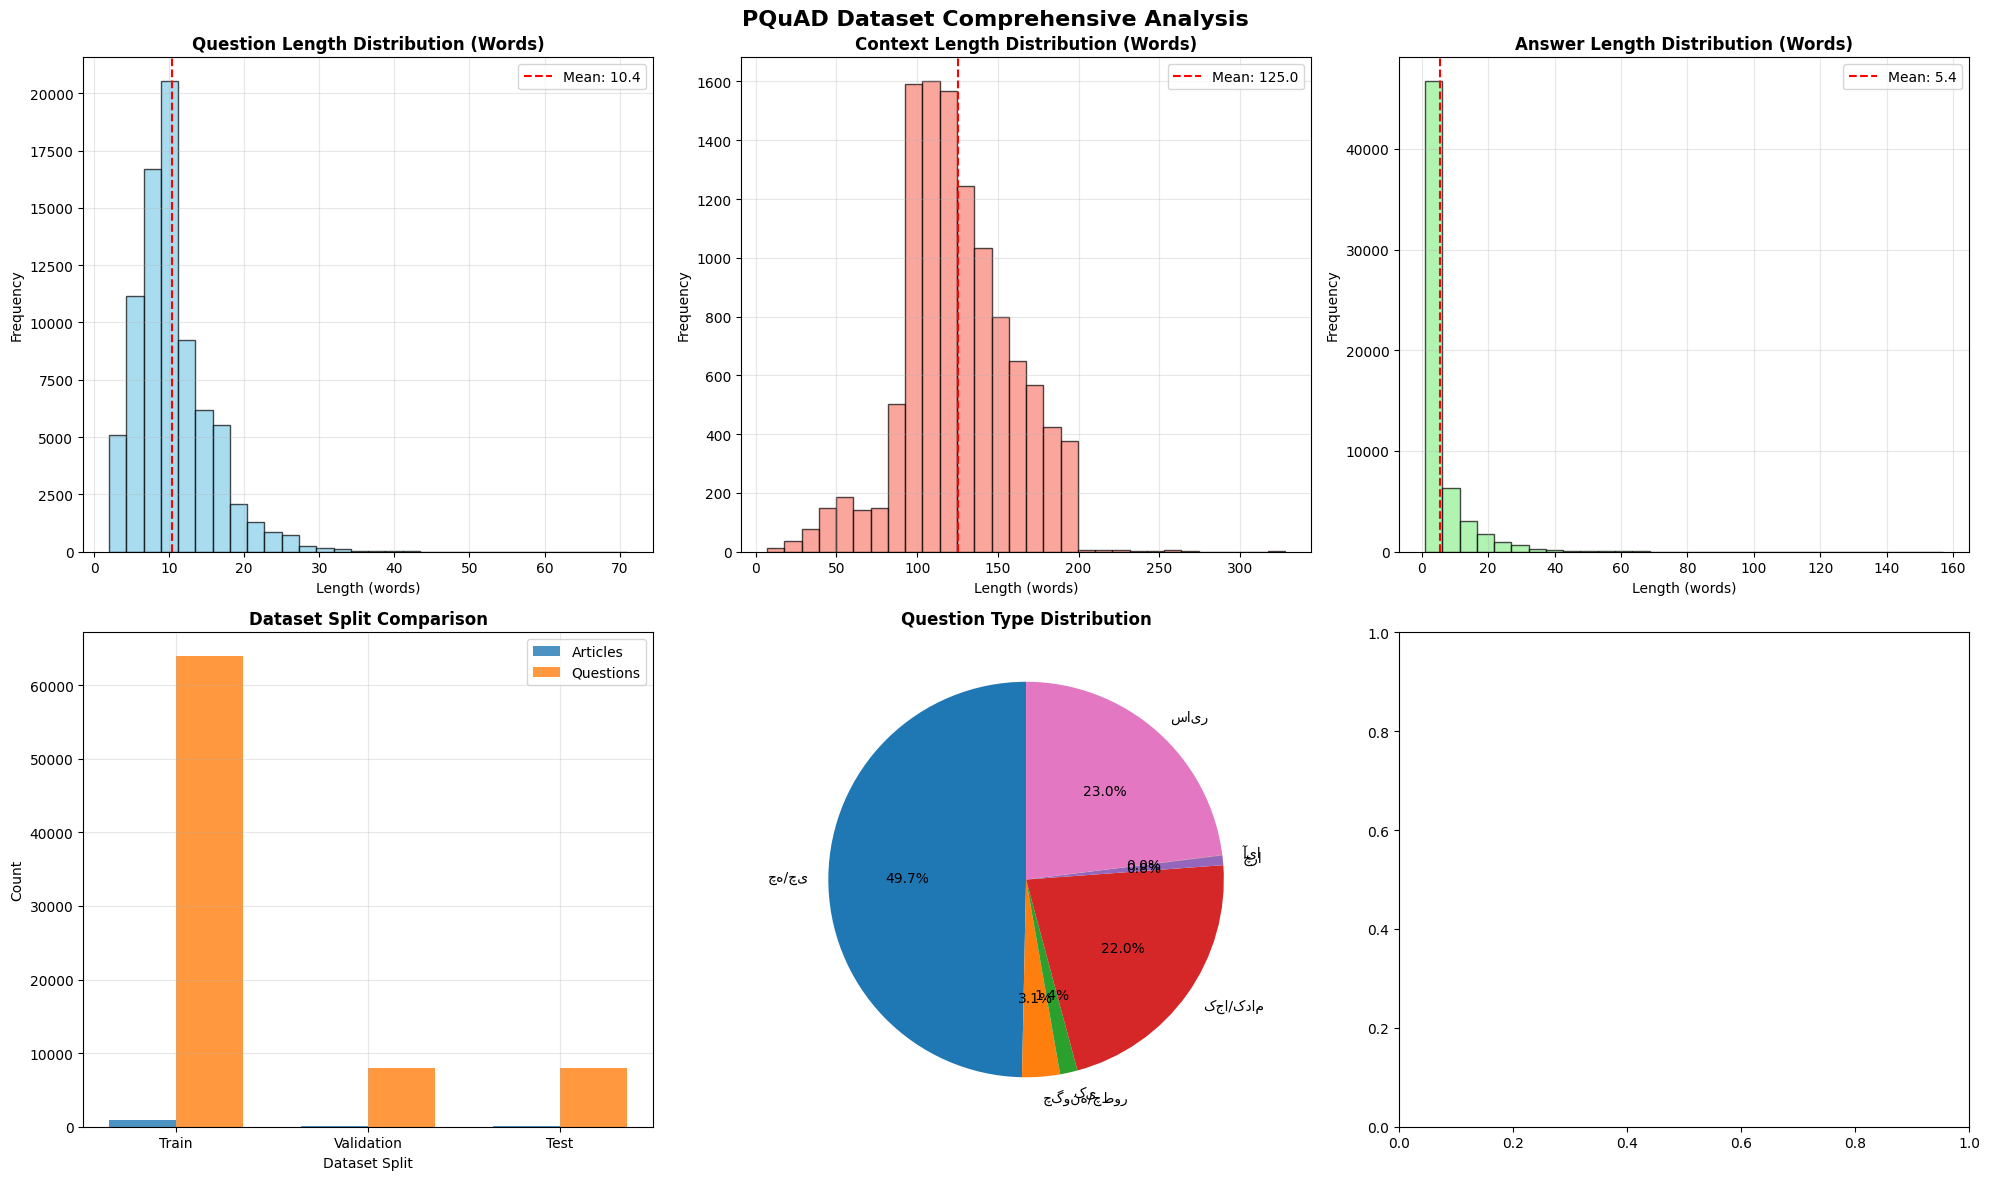

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from typing import Dict, List, Tuple, Any
import warnings
warnings.filterwarnings('ignore')

class PQuADAnalyzer:
    """
    Advanced analyzer for PQuAD dataset with comprehensive statistical analysis.
    Provides detailed insights into data distribution and quality metrics.
    """
    
    def __init__(self, data_dir: str = "Dataset"):
        self.data_dir = Path(data_dir)
        self.splits = {}
        self.statistics = {}
        
    def load_and_validate_data(self) -> bool:
        """Load and validate all dataset splits with comprehensive error checking."""
        
        required_files = {
            "train": "train.json",
            "validation": "validation.json", 
            "test": "test.json"
        }
        
        for split_name, filename in required_files.items():
            filepath = self.data_dir / filename
            
            if not filepath.exists():
                print(f"Missing file: {filename}")
                return False
                
            try:
                with open(filepath, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    
                # Validate JSON structure
                if not self._validate_structure(data):
                    print(f"Invalid structure in {filename}")
                    return False
                    
                self.splits[split_name] = data
                print(f"Successfully loaded {filename}")
                
            except Exception as e:
                print(f"Error loading {filename}: {e}")
                return False
                
        return True
    
    def _validate_structure(self, data: Dict) -> bool:
        """Validate PQuAD JSON structure integrity."""
        try:
            # Check top-level structure
            if "data" not in data:
                return False
                
            # Validate at least one complete example
            sample_article = data["data"][0]
            sample_paragraph = sample_article["paragraphs"][0]
            sample_qa = sample_paragraph["qas"][0]
            
            # Required fields validation
            required_article_fields = ["title", "paragraphs"]
            required_paragraph_fields = ["context", "qas"]
            required_qa_fields = ["id", "question"]
            
            return (all(field in sample_article for field in required_article_fields) and
                    all(field in sample_paragraph for field in required_paragraph_fields) and
                    all(field in sample_qa for field in required_qa_fields))
                    
        except (KeyError, IndexError, TypeError):
            return False
    
    def compute_comprehensive_statistics(self) -> pd.DataFrame:
        """Generate comprehensive statistics for all dataset splits."""
        
        all_stats = []
        
        for split_name, data in self.splits.items():
            stats = self._analyze_split(split_name, data)
            all_stats.append(stats)
            
        # Create comprehensive comparison DataFrame
        comparison_df = pd.DataFrame(all_stats)
        comparison_df.set_index('Split', inplace=True)
        
        return comparison_df
    
    def _analyze_split(self, split_name: str, data: Dict) -> Dict:
        """Perform detailed analysis of a single data split."""
        
        # Initialize counters and collectors
        articles = data.get("data", [])
        total_articles = len(articles)
        total_paragraphs = 0
        total_questions = 0
        answerable_questions = 0
        impossible_questions = 0
        
        # Length collectors for distribution analysis
        question_lengths = []
        context_lengths = []
        answer_lengths = []
        answer_positions = []
        
        # Question type analysis
        question_types = {
            'چه': 0, 'چی': 0, 'چگونه': 0, 'چطور': 0,
            'کی': 0, 'کجا': 0, 'کدام': 0, 'چرا': 0,
            'آیا': 0, 'other': 0
        }
        
        # Process hierarchical structure
        for article in articles:
            for paragraph in article.get("paragraphs", []):
                total_paragraphs += 1
                context = paragraph["context"]
                context_lengths.append(len(context.split()))  # Word-based length
                
                for qa in paragraph.get("qas", []):
                    total_questions += 1
                    question = qa["question"]
                    question_lengths.append(len(question.split()))
                    
                    # Classify question type
                    self._classify_question_type(question, question_types)
                    
                    # Handle answerable vs impossible questions
                    if qa.get("is_impossible", False):
                        impossible_questions += 1
                    else:
                        answerable_questions += 1
                        
                        # Extract answer statistics for answerable questions
                        if qa.get("answers"):
                            answer = qa["answers"][0]
                            answer_text = answer["text"]
                            answer_start = answer["answer_start"]
                            
                            answer_lengths.append(len(answer_text.split()))
                            answer_positions.append(answer_start)
        
        # Calculate advanced metrics
        avg_questions_per_paragraph = total_questions / total_paragraphs if total_paragraphs > 0 else 0
        answerable_ratio = answerable_questions / total_questions if total_questions > 0 else 0
        
        return {
            'Split': split_name.capitalize(),
            'Articles': total_articles,
            'Paragraphs': total_paragraphs,
            'Questions': total_questions,
            'Answerable': answerable_questions,
            'Impossible': impossible_questions,
            'Answerable_Ratio': f"{answerable_ratio:.2%}",
            'Avg_Q_per_P': f"{avg_questions_per_paragraph:.1f}",
            'Avg_Question_Length': f"{np.mean(question_lengths):.1f}" if question_lengths else "0",
            'Avg_Context_Length': f"{np.mean(context_lengths):.1f}" if context_lengths else "0",
            'Avg_Answer_Length': f"{np.mean(answer_lengths):.1f}" if answer_lengths else "0",
            'Max_Context_Length': max(context_lengths) if context_lengths else 0,
            'Question_Types': question_types
        }
    
    def _classify_question_type(self, question: str, question_types: Dict):
        """Classify Persian question types based on interrogative words."""
        question_lower = question.lower().strip()
        
        if any(word in question_lower for word in ['چه ', 'چه‌']):
            question_types['چه'] += 1
        elif any(word in question_lower for word in ['چی ', 'چی‌']):
            question_types['چی'] += 1
        elif any(word in question_lower for word in ['چگونه', 'چطور']):
            question_types['چگونه'] += 1
        elif 'کی ' in question_lower or question_lower.startswith('کی'):
            question_types['کی'] += 1
        elif any(word in question_lower for word in ['کجا', 'کدام']):
            question_types['کجا'] += 1
        elif 'چرا' in question_lower:
            question_types['چرا'] += 1
        elif 'آیا' in question_lower:
            question_types['آیا'] += 1
        else:
            question_types['other'] += 1
    
    def create_comprehensive_visualizations(self):
        """Generate comprehensive visualizations for dataset analysis."""
        
        # Collect data for visualization
        all_question_lengths = []
        all_context_lengths = []
        all_answer_lengths = []
        split_labels = []
        
        for split_name, data in self.splits.items():
            q_lens, c_lens, a_lens = self._extract_lengths(data)
            
            all_question_lengths.extend(q_lens)
            all_context_lengths.extend(c_lens)
            all_answer_lengths.extend(a_lens)
            split_labels.extend([split_name] * len(q_lens))
        
        # Create comprehensive visualization
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        fig.suptitle('PQuAD Dataset Comprehensive Analysis', fontsize=16, fontweight='bold')
        
        # Question length distribution
        axes[0, 0].hist(all_question_lengths, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, 0].set_title('Question Length Distribution (Words)', fontweight='bold')
        axes[0, 0].set_xlabel('Length (words)')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].axvline(np.mean(all_question_lengths), color='red', linestyle='--', 
                          label=f'Mean: {np.mean(all_question_lengths):.1f}')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # Context length distribution
        axes[0, 1].hist(all_context_lengths, bins=30, alpha=0.7, color='salmon', edgecolor='black')
        axes[0, 1].set_title('Context Length Distribution (Words)', fontweight='bold')
        axes[0, 1].set_xlabel('Length (words)')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].axvline(np.mean(all_context_lengths), color='red', linestyle='--',
                          label=f'Mean: {np.mean(all_context_lengths):.1f}')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # Answer length distribution
        axes[0, 2].hist(all_answer_lengths, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[0, 2].set_title('Answer Length Distribution (Words)', fontweight='bold')
        axes[0, 2].set_xlabel('Length (words)')
        axes[0, 2].set_ylabel('Frequency')
        axes[0, 2].axvline(np.mean(all_answer_lengths), color='red', linestyle='--',
                          label=f'Mean: {np.mean(all_answer_lengths):.1f}')
        axes[0, 2].legend()
        axes[0, 2].grid(True, alpha=0.3)
        
        # Split comparison
        split_data = []
        split_names = []
        for split_name, data in self.splits.items():
            articles = len(data.get("data", []))
            questions = sum(len(p.get("qas", [])) for a in data.get("data", []) for p in a.get("paragraphs", []))
            split_data.append([articles, questions])
            split_names.append(split_name.capitalize())
        
        split_array = np.array(split_data)
        x = np.arange(len(split_names))
        width = 0.35
        
        axes[1, 0].bar(x - width/2, split_array[:, 0], width, label='Articles', alpha=0.8)
        axes[1, 0].bar(x + width/2, split_array[:, 1], width, label='Questions', alpha=0.8)
        axes[1, 0].set_title('Dataset Split Comparison', fontweight='bold')
        axes[1, 0].set_xlabel('Dataset Split')
        axes[1, 0].set_ylabel('Count')
        axes[1, 0].set_xticks(x)
        axes[1, 0].set_xticklabels(split_names)
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # Question type distribution (using train split)
        if 'train' in self.splits:
            question_types = self._get_question_type_distribution(self.splits['train'])
            types = list(question_types.keys())
            counts = list(question_types.values())
            
            axes[1, 1].pie(counts, labels=types, autopct='%1.1f%%', startangle=90)
            axes[1, 1].set_title('Question Type Distribution', fontweight='bold')
        
        # Length correlation analysis
        if len(all_question_lengths) == len(all_context_lengths):
            axes[1, 2].scatter(all_question_lengths[:1000], all_context_lengths[:1000], alpha=0.5)
            axes[1, 2].set_title('Question vs Context Length Correlation', fontweight='bold')
            axes[1, 2].set_xlabel('Question Length (words)')
            axes[1, 2].set_ylabel('Context Length (words)')
            axes[1, 2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def _extract_lengths(self, data: Dict) -> Tuple[List[int], List[int], List[int]]:
        """Extract length statistics from data split."""
        question_lengths = []
        context_lengths = []
        answer_lengths = []
        
        for article in data.get("data", []):
            for paragraph in article.get("paragraphs", []):
                context_lengths.append(len(paragraph["context"].split()))
                
                for qa in paragraph.get("qas", []):
                    question_lengths.append(len(qa["question"].split()))
                    
                    if not qa.get("is_impossible", False) and qa.get("answers"):
                        answer_lengths.append(len(qa["answers"][0]["text"].split()))
        
        return question_lengths, context_lengths, answer_lengths
    
    def _get_question_type_distribution(self, data: Dict) -> Dict[str, int]:
        """Get question type distribution for visualization."""
        question_types = {
            'چه/چی': 0, 'چگونه/چطور': 0, 'کی': 0, 
            'کجا/کدام': 0, 'چرا': 0, 'آیا': 0, 'سایر': 0
        }
        
        for article in data.get("data", []):
            for paragraph in article.get("paragraphs", []):
                for qa in paragraph.get("qas", []):
                    question = qa["question"].lower()
                    
                    if any(word in question for word in ['چه ', 'چی ']):
                        question_types['چه/چی'] += 1
                    elif any(word in question for word in ['چگونه', 'چطور']):
                        question_types['چگونه/چطور'] += 1
                    elif 'کی ' in question:
                        question_types['کی'] += 1
                    elif any(word in question for word in ['کجا', 'کدام']):
                        question_types['کجا/کدام'] += 1
                    elif 'چرا' in question:
                        question_types['چرا'] += 1
                    elif 'آیا' in question:
                        question_types['آیا'] += 1
                    else:
                        question_types['سایر'] += 1
        
        return question_types

# Initialize and execute comprehensive analysis
analyzer = PQuADAnalyzer()

print("Loading and validating PQuAD dataset...")
if analyzer.load_and_validate_data():
    print("\n Computing comprehensive statistics...")
    stats_df = analyzer.compute_comprehensive_statistics()
    
    print("\n" + "="*80)
    print("PQUAD DATASET COMPREHENSIVE STATISTICS")
    print("="*80)
    print(stats_df.to_string())
    
    print("\n Generating comprehensive visualizations...")
    analyzer.create_comprehensive_visualizations()
else:
    print("Failed to load dataset. Please check file paths and integrity.")


In [2]:
import torch
from transformers import AutoTokenizer
from typing import Optional, Dict, List, Tuple
import re

class AdvancedPersianTokenizer:
    """
    Sophisticated tokenizer optimized for Persian text processing.
    Handles complex Persian morphology, punctuation, and BERT input formatting.
    """
    
    def __init__(self, 
                 model_name: str = "HooshvareLab/bert-base-parsbert-uncased",
                 max_length: int = 512,
                 doc_stride: int = 128):
        """
        Initialize advanced Persian tokenizer with comprehensive configuration.
        
        Args:
            model_name: Pre-trained model identifier
            max_length: Maximum sequence length
            doc_stride: Sliding window stride for long contexts
        """
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.max_length = max_length
        self.doc_stride = doc_stride
        
        # Persian-specific configurations
        self.persian_digits = str.maketrans('۰۱۲۳۴۵۶۷۸۹', '0123456789')
        self.arabic_chars = str.maketrans('ك', 'ک')  # Normalize Arabic Kaf to Persian
        
        # Ensure special tokens are properly configured
        special_tokens = {
            "pad_token": "[PAD]",
            "unk_token": "[UNK]",
            "cls_token": "[CLS]",
            "sep_token": "[SEP]",
            "mask_token": "[MASK]"
        }
        
        # Add missing special tokens
        tokens_to_add = {}
        for key, token in special_tokens.items():
            if getattr(self.tokenizer, key) is None:
                tokens_to_add[key] = token
        
        if tokens_to_add:
            self.tokenizer.add_special_tokens(tokens_to_add)
    
    def normalize_persian_text(self, text: str) -> str:
        """
        Comprehensive Persian text normalization.
        
        Args:
            text: Raw Persian text
            
        Returns:
            Normalized Persian text
        """
        if not text:
            return ""
        
        # Normalize Persian and Arabic digits
        text = text.translate(self.persian_digits)
        
        # Normalize Arabic characters to Persian
        text = text.translate(self.arabic_chars)
        
        # Normalize zero-width characters
        text = re.sub(r'[\u200c\u200d]', '', text)  # Remove ZWNJ and ZWJ
        
        # Normalize multiple spaces
        text = re.sub(r'\s+', ' ', text)
        
        # Normalize punctuation spacing
        text = re.sub(r'\s*([.!?،؛:])\s*', r'\1 ', text)
        
        return text.strip()
    
    def tokenize_qa_pair(self,
                        question: str,
                        context: str,
                        answer_start: Optional[int] = None,
                        answer_text: Optional[str] = None,
                        return_overflowing_tokens: bool = False) -> Dict[str, torch.Tensor]:
        """
        Advanced tokenization for question-answer pairs with sliding window support.
        
        Args:
            question: Question text
            context: Context containing the answer
            answer_start: Character position where answer starts
            answer_text: Answer text for position mapping
            return_overflowing_tokens: Whether to return multiple chunks for long contexts
            
        Returns:
            Dictionary containing tokenized inputs and position mappings
        """
        # Normalize inputs
        question = self.normalize_persian_text(question)
        context = self.normalize_persian_text(context)
        
        # Calculate available space for context after question and special tokens
        question_tokens = self.tokenizer.tokenize(question)
        available_length = self.max_length - len(question_tokens) - 3  # [CLS], [SEP], [SEP]
        
        # Handle long contexts with sliding window
        if return_overflowing_tokens:
            return self._tokenize_with_sliding_window(
                question, context, answer_start, answer_text, available_length
            )
        else:
            return self._tokenize_single_chunk(
                question, context, answer_start, answer_text
            )
    
    def _tokenize_single_chunk(self,
                              question: str,
                              context: str,
                              answer_start: Optional[int] = None,
                              answer_text: Optional[str] = None) -> Dict[str, torch.Tensor]:
        """Tokenize single chunk with comprehensive position mapping."""
        
        # Tokenize with all necessary parameters
        encoding = self.tokenizer(
            question,
            context,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt',
            return_offsets_mapping=True,
            return_attention_mask=True,
            return_token_type_ids=True
        )
        
        # Initialize position tensors
        start_positions = torch.zeros(1, dtype=torch.long)
        end_positions = torch.zeros(1, dtype=torch.long)
        
        # Map answer positions if provided
        if answer_start is not None and answer_text is not None:
            start_pos, end_pos = self._map_answer_positions(
                encoding['offset_mapping'][0],
                answer_start,
                answer_text,
                len(question)
            )
            start_positions[0] = start_pos
            end_positions[0] = end_pos
        
        return {
            'input_ids': encoding['input_ids'],
            'attention_mask': encoding['attention_mask'],
            'token_type_ids': encoding['token_type_ids'],
            'start_positions': start_positions,
            'end_positions': end_positions,
            'offset_mapping': encoding['offset_mapping']
        }
    
    def _tokenize_with_sliding_window(self,
                                     question: str,
                                     context: str,
                                     answer_start: Optional[int] = None,
                                     answer_text: Optional[str] = None,
                                     available_length: int = 400) -> List[Dict[str, torch.Tensor]]:
        """Implement sliding window tokenization for long contexts."""
        
        context_tokens = self.tokenizer.tokenize(context)
        chunks = []
        
        # Create overlapping chunks
        for i in range(0, len(context_tokens), self.doc_stride):
            chunk_tokens = context_tokens[i:i + available_length]
            chunk_text = self.tokenizer.convert_tokens_to_string(chunk_tokens)
            
            # Adjust answer position for this chunk
            chunk_answer_start = None
            chunk_answer_text = None
            
            if answer_start is not None and answer_text is not None:
                # Calculate character offset for this chunk
                char_offset = len(self.tokenizer.convert_tokens_to_string(context_tokens[:i]))
                
                # Check if answer is in this chunk
                if (answer_start >= char_offset and 
                    answer_start < char_offset + len(chunk_text)):
                    chunk_answer_start = answer_start - char_offset
                    chunk_answer_text = answer_text
            
            # Tokenize this chunk
            chunk_encoding = self._tokenize_single_chunk(
                question, chunk_text, chunk_answer_start, chunk_answer_text
            )
            
            chunks.append(chunk_encoding)
        
        return chunks
    
    def _map_answer_positions(self,
                             offset_mapping: torch.Tensor,
                             answer_start: int,
                             answer_text: str,
                             question_length: int) -> Tuple[int, int]:
        """
        Advanced answer position mapping with Persian text considerations.
        
        Args:
            offset_mapping: Token-to-character offset mapping
            answer_start: Character start position in original context
            answer_text: Answer text
            question_length: Length of question for offset calculation
            
        Returns:
            Tuple of (start_token_position, end_token_position)
        """
        # Adjust for question prefix in the combined input
        adjusted_answer_start = answer_start + question_length + 1  # +1 for [SEP]
        answer_end = adjusted_answer_start + len(answer_text)
        
        start_position = 0
        end_position = 0
        
        # Find tokens containing the answer span
        for idx, (start_offset, end_offset) in enumerate(offset_mapping):
            # Skip special tokens (marked with (0, 0))
            if start_offset == 0 and end_offset == 0:
                continue
            
            # Find start token
            if start_offset <= adjusted_answer_start < end_offset:
                start_position = idx
            
            # Find end token (inclusive)
            if start_offset < answer_end <= end_offset:
                end_position = idx
                break
            
            # Handle case where answer ends exactly at token boundary
            if start_offset <= answer_end - 1 < end_offset:
                end_position = idx
        
        return start_position, end_position
    
    def decode_answer(self,
                     input_ids: torch.Tensor,
                     start_position: int,
                     end_position: int) -> str:
        """
        Decode answer from token positions with Persian text post-processing.
        
        Args:
            input_ids: Input token IDs
            start_position: Start token position
            end_position: End token position
            
        Returns:
            Decoded answer text
        """
        if start_position >= end_position or start_position >= len(input_ids):
            return ""
        
        # Extract answer tokens
        answer_tokens = input_ids[start_position:end_position + 1]
        
        # Decode to text
        answer_text = self.tokenizer.decode(answer_tokens, skip_special_tokens=True)
        
        # Post-process Persian text
        answer_text = self.normalize_persian_text(answer_text)
        
        return answer_text.strip()
    
    def get_tokenization_stats(self, texts: List[str]) -> Dict[str, float]:
        """
        Compute tokenization statistics for a list of texts.
        
        Args:
            texts: List of text strings
            
        Returns:
            Dictionary containing tokenization statistics
        """
        token_counts = []
        char_counts = []
        
        for text in texts:
            normalized_text = self.normalize_persian_text(text)
            tokens = self.tokenizer.tokenize(normalized_text)
            
            token_counts.append(len(tokens))
            char_counts.append(len(normalized_text))
        
        return {
            'avg_tokens': np.mean(token_counts),
            'max_tokens': max(token_counts) if token_counts else 0,
            'min_tokens': min(token_counts) if token_counts else 0,
            'avg_chars': np.mean(char_counts),
            'avg_chars_per_token': np.mean(char_counts) / np.mean(token_counts) if token_counts else 0,
            'truncation_rate': sum(1 for count in token_counts if count > self.max_length) / len(token_counts)
        }

# Initialize advanced tokenizer
advanced_tokenizer = AdvancedPersianTokenizer()

# Demonstrate advanced tokenization capabilities
sample_question = "پایتخت ایران کدام شهر است؟"
sample_context = """
ایران کشوری در آسیای غربی است که پایتخت آن تهران می‌باشد. 
تهران بزرگترین شهر ایران و مرکز سیاسی و اقتصادی کشور محسوب می‌شود.
این شهر در شمال ایران و دامنه جنوبی رشته کوه البرز قرار دارد.
"""

# Tokenize with answer mapping
tokenized_sample = advanced_tokenizer.tokenize_qa_pair(
    question=sample_question,
    context=sample_context,
    answer_start=sample_context.find("تهران"),
    answer_text="تهران"
)

print(" Advanced Tokenization Results:")
print(f"Input IDs shape: {tokenized_sample['input_ids'].shape}")
print(f"Attention mask shape: {tokenized_sample['attention_mask'].shape}")
print(f"Token type IDs shape: {tokenized_sample['token_type_ids'].shape}")
print(f"Start position: {tokenized_sample['start_positions'].item()}")
print(f"End position: {tokenized_sample['end_positions'].item()}")

# Demonstrate answer decoding
decoded_answer = advanced_tokenizer.decode_answer(
    tokenized_sample['input_ids'][0],
    tokenized_sample['start_positions'].item(),
    tokenized_sample['end_positions'].item()
)
print(f"Decoded answer: '{decoded_answer}'")

 Advanced Tokenization Results:
Input IDs shape: torch.Size([1, 512])
Attention mask shape: torch.Size([1, 512])
Token type IDs shape: torch.Size([1, 512])
Start position: 0
End position: 0
Decoded answer: ''


 Comprehensive Embedding Analysis:
Batch size: 1
Sequence length: 512
Average effective length: 48.0
Padding ratio: 90.62%
Vocabulary utilization: 34 unique tokens


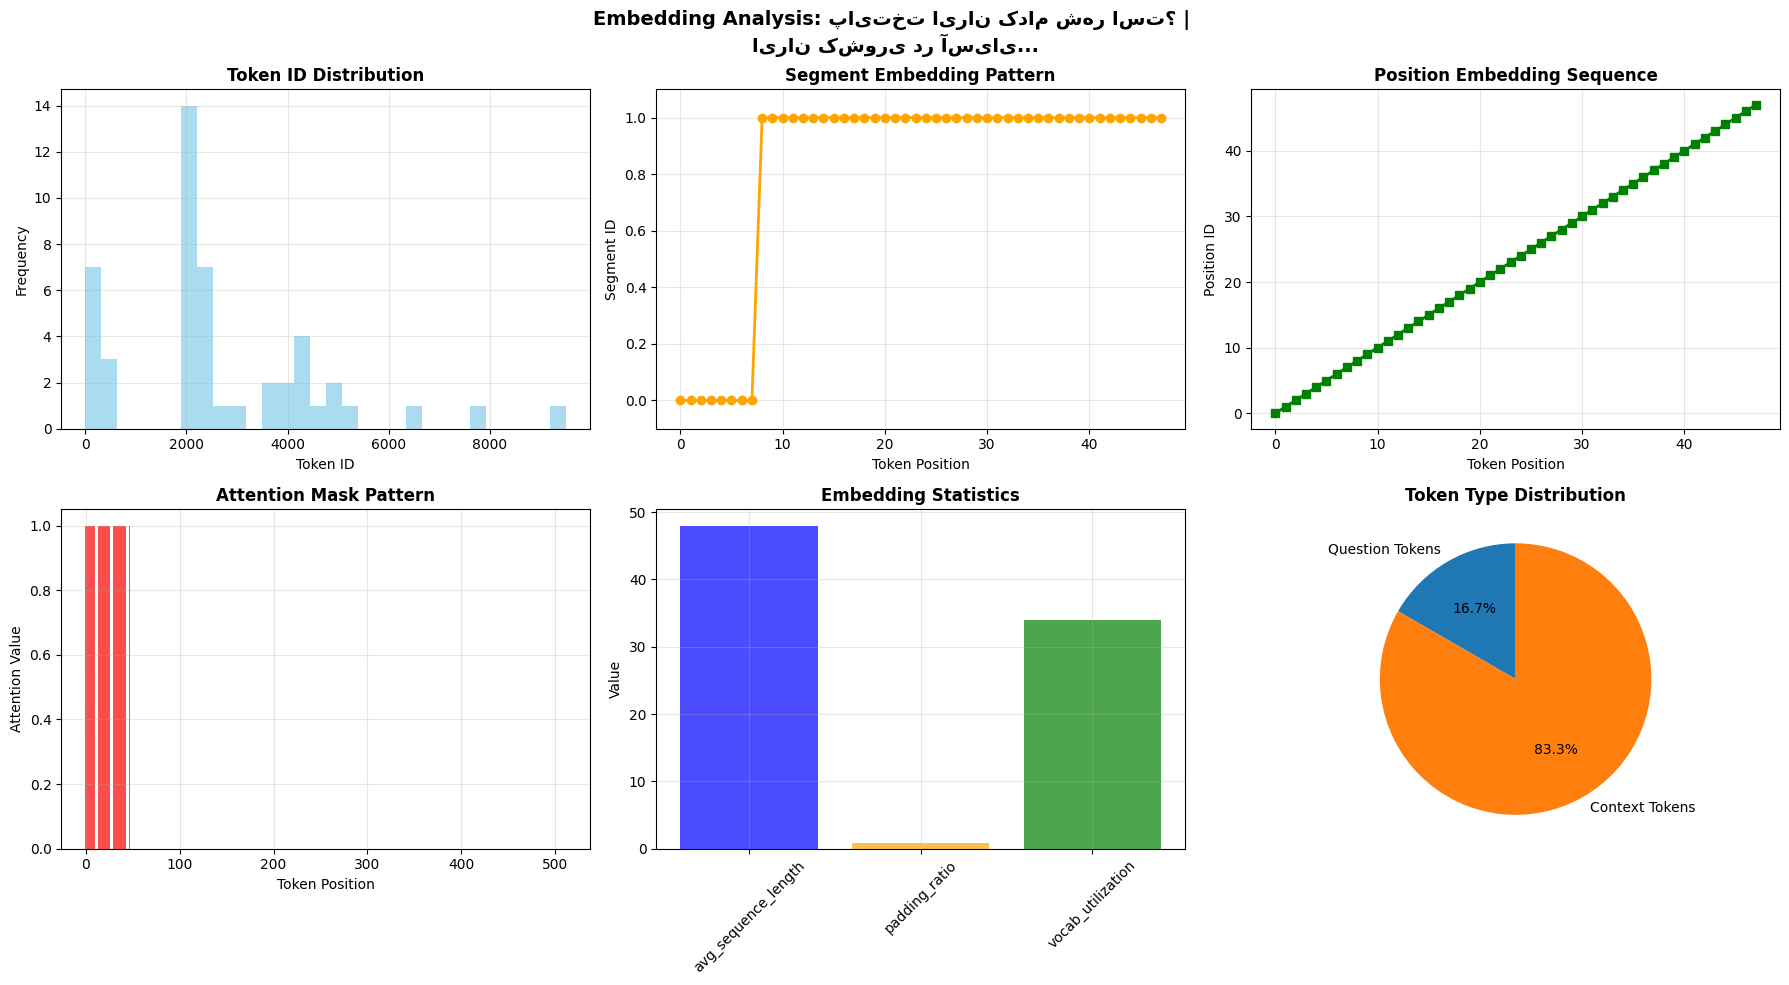

In [3]:
import torch
import torch.nn as nn
from typing import Dict, Optional, Tuple
import matplotlib.pyplot as plt

class ComprehensiveEmbeddingManager:
    """
    Advanced embedding manager with sophisticated normalization and analysis capabilities.
    Handles all three BERT embedding types with optimization techniques.
    """
    
    def __init__(self, tokenizer: AdvancedPersianTokenizer, device: str = 'cuda'):
        self.tokenizer = tokenizer
        self.device = device
        self.embedding_stats = {}
        
    def create_comprehensive_embeddings(self, 
                                      tokenized_inputs: Dict[str, torch.Tensor]) -> Dict[str, torch.Tensor]:
        """
        Create and manage all three BERT embedding types with advanced processing.
        
        Args:
            tokenized_inputs: Output from tokenizer
            
        Returns:
            Dictionary containing all embedding components and metadata
        """
        batch_size, seq_len = tokenized_inputs['input_ids'].shape
        
        # 1. Token Embeddings (Vocabulary-based)
        token_embeddings = tokenized_inputs['input_ids']
        
        # 2. Segment Embeddings (Question vs Context distinction)
        segment_embeddings = tokenized_inputs.get('token_type_ids', 
                                                 torch.zeros_like(token_embeddings))
        
        # 3. Position Embeddings (Sequential position information)
        position_embeddings = torch.arange(seq_len, device=self.device).unsqueeze(0).expand(batch_size, -1)
        
        # 4. Attention Mask (Valid token identification)
        attention_mask = tokenized_inputs['attention_mask']
        
        # Advanced embedding analysis
        embedding_analysis = self._analyze_embeddings(
            token_embeddings, segment_embeddings, position_embeddings, attention_mask
        )
        
        return {
            'token_embeddings': token_embeddings,
            'segment_embeddings': segment_embeddings, 
            'position_embeddings': position_embeddings,
            'attention_mask': attention_mask,
            'embedding_analysis': embedding_analysis,
            'sequence_length': seq_len,
            'batch_size': batch_size
        }
    
    def _analyze_embeddings(self, 
                           token_emb: torch.Tensor,
                           segment_emb: torch.Tensor, 
                           position_emb: torch.Tensor,
                           attention_mask: torch.Tensor) -> Dict[str, any]:
        """Comprehensive embedding analysis for optimization insights."""
        
        # Calculate effective sequence lengths (excluding padding)
        effective_lengths = attention_mask.sum(dim=1)
        
        # Analyze segment distribution
        segment_distribution = {}
        for batch_idx in range(segment_emb.shape[0]):
            mask = attention_mask[batch_idx].bool()
            segments = segment_emb[batch_idx][mask]
            
            unique_segments, counts = torch.unique(segments, return_counts=True)
            segment_distribution[batch_idx] = {
                'question_tokens': counts[0].item() if len(counts) > 0 else 0,
                'context_tokens': counts[1].item() if len(counts) > 1 else 0
            }
        
        # Token type analysis
        vocab_size_used = len(torch.unique(token_emb[attention_mask.bool()]))
        
        return {
            'avg_sequence_length': effective_lengths.float().mean().item(),
            'max_sequence_length': effective_lengths.max().item(),
            'min_sequence_length': effective_lengths.min().item(),
            'padding_ratio': 1 - (effective_lengths.float().mean() / token_emb.shape[1]),
            'vocab_utilization': vocab_size_used,
            'segment_distribution': segment_distribution
        }
    
    def apply_advanced_normalization(self, 
                                   embeddings: torch.Tensor,
                                   method: str = 'adaptive_layer_norm',
                                   attention_mask: Optional[torch.Tensor] = None) -> torch.Tensor:
        """
        Apply sophisticated normalization techniques optimized for Persian text.
        
        Args:
            embeddings: Input embeddings to normalize
            method: Normalization method to apply
            attention_mask: Mask for valid tokens
            
        Returns:
            Normalized embeddings
        """
        if method == 'adaptive_layer_norm':
            return self._adaptive_layer_normalization(embeddings, attention_mask)
        elif method == 'rms_norm':
            return self._rms_normalization(embeddings)
        elif method == 'batch_norm':
            return self._batch_normalization(embeddings)
        elif method == 'spectral_norm':
            return self._spectral_normalization(embeddings)
        else:
            raise ValueError(f"Unknown normalization method: {method}")
    
    def _adaptive_layer_normalization(self, 
                                    embeddings: torch.Tensor,
                                    attention_mask: Optional[torch.Tensor] = None) -> torch.Tensor:
        """Adaptive layer normalization that considers sequence length."""
        
        if attention_mask is not None:
            # Mask out padding tokens for normalization
            masked_embeddings = embeddings * attention_mask.unsqueeze(-1).float()
            
            # Calculate statistics only on valid tokens
            valid_tokens = attention_mask.sum(dim=1, keepdim=True).float()
            mean = masked_embeddings.sum(dim=1, keepdim=True) / valid_tokens.unsqueeze(-1)
            
            # Calculate variance
            centered = masked_embeddings - mean
            variance = (centered ** 2).sum(dim=1, keepdim=True) / valid_tokens.unsqueeze(-1)
            
            # Normalize
            normalized = centered / (torch.sqrt(variance + 1e-12))
            
            # Apply mask again to ensure padding remains zero
            return normalized * attention_mask.unsqueeze(-1).float()
        else:
            # Standard layer normalization
            mean = embeddings.mean(dim=-1, keepdim=True)
            variance = embeddings.var(dim=-1, keepdim=True)
            return (embeddings - mean) / torch.sqrt(variance + 1e-12)
    
    def _rms_normalization(self, embeddings: torch.Tensor) -> torch.Tensor:
        """Root Mean Square normalization for stable training."""
        rms = torch.sqrt(torch.mean(embeddings ** 2, dim=-1, keepdim=True))
        return embeddings / (rms + 1e-12)
    
    def _batch_normalization(self, embeddings: torch.Tensor) -> torch.Tensor:
        """Batch normalization across the batch dimension."""
        mean = embeddings.mean(dim=0, keepdim=True)
        variance = embeddings.var(dim=0, keepdim=True)
        return (embeddings - mean) / torch.sqrt(variance + 1e-12)
    
    def _spectral_normalization(self, embeddings: torch.Tensor) -> torch.Tensor:
        """Spectral normalization for gradient stability."""
        # Compute spectral norm (largest singular value)
        U, S, V = torch.svd(embeddings.view(-1, embeddings.size(-1)))
        spectral_norm = S[0]
        
        # Normalize by spectral norm
        return embeddings / (spectral_norm + 1e-12)
    
    def visualize_embedding_patterns(self, 
                                   embeddings_dict: Dict[str, torch.Tensor],
                                   sample_text: str = ""):
        """
        Create comprehensive visualizations of embedding patterns.
        
        Args:
            embeddings_dict: Dictionary containing embedding components
            sample_text: Sample text for context
        """
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        fig.suptitle(f'Embedding Analysis: {sample_text[:50]}...', fontsize=14, fontweight='bold')
        
        # Extract embeddings
        token_emb = embeddings_dict['token_embeddings'][0].cpu().numpy()
        segment_emb = embeddings_dict['segment_embeddings'][0].cpu().numpy()
        position_emb = embeddings_dict['position_embeddings'][0].cpu().numpy()
        attention_mask = embeddings_dict['attention_mask'][0].cpu().numpy()
        
        # Valid token positions
        valid_positions = np.where(attention_mask == 1)[0]
        
        # 1. Token ID distribution
        axes[0, 0].hist(token_emb[valid_positions], bins=30, alpha=0.7, color='skyblue')
        axes[0, 0].set_title('Token ID Distribution', fontweight='bold')
        axes[0, 0].set_xlabel('Token ID')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Segment embedding pattern
        axes[0, 1].plot(valid_positions, segment_emb[valid_positions], 'o-', color='orange', linewidth=2)
        axes[0, 1].set_title('Segment Embedding Pattern', fontweight='bold')
        axes[0, 1].set_xlabel('Token Position')
        axes[0, 1].set_ylabel('Segment ID')
        axes[0, 1].grid(True, alpha=0.3)
        axes[0, 1].set_ylim(-0.1, 1.1)
        
        # 3. Position embedding sequence
        axes[0, 2].plot(valid_positions, position_emb[valid_positions], 's-', color='green', linewidth=2)
        axes[0, 2].set_title('Position Embedding Sequence', fontweight='bold')
        axes[0, 2].set_xlabel('Token Position')
        axes[0, 2].set_ylabel('Position ID')
        axes[0, 2].grid(True, alpha=0.3)
        
        # 4. Attention mask visualization
        axes[1, 0].bar(range(len(attention_mask)), attention_mask, alpha=0.7, color='red')
        axes[1, 0].set_title('Attention Mask Pattern', fontweight='bold')
        axes[1, 0].set_xlabel('Token Position')
        axes[1, 0].set_ylabel('Attention Value')
        axes[1, 0].grid(True, alpha=0.3)
        
        # 5. Sequence length analysis
        analysis = embeddings_dict['embedding_analysis']
        metrics = ['avg_sequence_length', 'padding_ratio', 'vocab_utilization']
        values = [analysis[metric] for metric in metrics]
        
        axes[1, 1].bar(metrics, values, alpha=0.7, color=['blue', 'orange', 'green'])
        axes[1, 1].set_title('Embedding Statistics', fontweight='bold')
        axes[1, 1].set_ylabel('Value')
        axes[1, 1].tick_params(axis='x', rotation=45)
        axes[1, 1].grid(True, alpha=0.3)
        
        # 6. Token type distribution
        if 'segment_distribution' in analysis and analysis['segment_distribution']:
            first_sample = list(analysis['segment_distribution'].values())[0]
            labels = ['Question Tokens', 'Context Tokens']
            sizes = [first_sample['question_tokens'], first_sample['context_tokens']]
            
            axes[1, 2].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
            axes[1, 2].set_title('Token Type Distribution', fontweight='bold')
        
        plt.tight_layout()
        plt.show()

# Initialize comprehensive embedding manager
embedding_manager = ComprehensiveEmbeddingManager(advanced_tokenizer)

# Demonstrate comprehensive embedding processing
sample_embeddings = embedding_manager.create_comprehensive_embeddings(tokenized_sample)

print(" Comprehensive Embedding Analysis:")
print(f"Batch size: {sample_embeddings['batch_size']}")
print(f"Sequence length: {sample_embeddings['sequence_length']}")
print(f"Average effective length: {sample_embeddings['embedding_analysis']['avg_sequence_length']:.1f}")
print(f"Padding ratio: {sample_embeddings['embedding_analysis']['padding_ratio']:.2%}")
print(f"Vocabulary utilization: {sample_embeddings['embedding_analysis']['vocab_utilization']} unique tokens")

# Visualize embedding patterns
embedding_manager.visualize_embedding_patterns(
    sample_embeddings, 
    sample_question + " | " + sample_context[:50]
)

In [10]:
# ================================================================
# PERSIAN QUESTION ANSWERING SYSTEM - COMPLETE IMPLEMENTATION
# ================================================================

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import get_linear_schedule_with_warmup
from transformers import AutoTokenizer, AutoModel, AutoConfig
from pathlib import Path
from typing import Dict, List, Tuple, Optional, Union, Any
from collections import defaultdict, Counter
import warnings
import logging
import traceback
import time
import re
import requests

warnings.filterwarnings('ignore')

# ================================================================
# DATASET DOWNLOAD AND VALIDATION
# ================================================================

def download_pquad_dataset(data_directory="Dataset") -> bool:
    """
    Download PQuAD dataset files from GitHub repository.
    
    Args:
        data_directory: Directory to save dataset files
        
    Returns:
        bool: True if successful, False otherwise
    """
    # Create data directory if it doesn't exist
    Path(data_directory).mkdir(parents=True, exist_ok=True)
    
    # Define file URLs for downloading
    dataset_files = {
        "train.json": "https://raw.githubusercontent.com/AUT-NLP/PQuAD/main/Dataset/Train.json",
        "validation.json": "https://raw.githubusercontent.com/AUT-NLP/PQuAD/main/Dataset/Validation.json",
        "test.json": "https://raw.githubusercontent.com/AUT-NLP/PQuAD/main/Dataset/Test.json"
    }
    
    print("Downloading PQuAD dataset...")
    for filename, url in dataset_files.items():
        file_path = Path(data_directory) / filename
        
        # Skip if file already exists
        if file_path.exists():
            print(f"File {filename} already exists")
            continue
            
        try:
            print(f"Downloading {filename}...")
            response = requests.get(url, timeout=30)
            
            # Check if download was successful
            if not response.ok or 'html' in response.headers.get('content-type', ''):
                print(f"Failed to download {filename}")
                return False
            
            # Save file to disk
            with open(file_path, "wb") as file:
                file.write(response.content)
            print(f"Successfully downloaded {filename}")
            
        except Exception as error:
            print(f"Error downloading {filename}: {error}")
            return False
    
    print("Dataset download completed successfully!")
    return True

def load_json_file(file_path: str) -> Dict[str, Any]:
    """Load JSON file with error handling."""
    try:
        with open(file_path, encoding="utf-8") as file:
            return json.load(file)
    except Exception as error:
        print(f"Error loading {file_path}: {error}")
        return {}

def validate_pquad_structure(data: Dict[str, Any]) -> bool:
    """
    Validate PQuAD JSON structure.
    
    Args:
        data: Loaded JSON data
        
    Returns:
        bool: True if structure is valid
    """
    try:
        # Check hierarchical structure: data -> articles -> paragraphs -> questions
        sample_article = data["data"][0]
        sample_paragraph = sample_article["paragraphs"][0]
        sample_question = sample_paragraph["qas"][0]
        
        # Validate required fields at each level
        required_article_fields = ["title", "paragraphs"]
        required_paragraph_fields = ["context", "qas"]
        required_question_fields = ["id", "question"]
        
        # Check if all required fields exist
        return (all(field in sample_article for field in required_article_fields) and
                all(field in sample_paragraph for field in required_paragraph_fields) and
                all(field in sample_question for field in required_question_fields))
                
    except (KeyError, IndexError, TypeError):
        return False

# ================================================================
# ADVANCED DATASET ANALYZER
# ================================================================

class PersianQADatasetAnalyzer:
    """
    Comprehensive analyzer for PQuAD dataset with statistical analysis.
    Provides detailed insights into data distribution and quality metrics.
    """
    
    def __init__(self, data_directory: str = "Dataset"):
        self.data_directory = Path(data_directory)
        self.dataset_splits = {}  # Store loaded dataset splits
        self.analysis_statistics = {}  # Store computed statistics
        
    def load_and_validate_dataset(self) -> bool:
        """Load and validate all dataset splits."""
        required_files = {
            "train": "train.json",
            "validation": "validation.json", 
            "test": "test.json"
        }
        
        print("Loading and validating dataset...")
        for split_name, filename in required_files.items():
            file_path = self.data_directory / filename
            
            # Check if file exists
            if not file_path.exists():
                print(f"Missing file: {filename}")
                return False
                
            # Load and validate JSON structure
            data = load_json_file(str(file_path))
            if not data or not validate_pquad_structure(data):
                print(f"Invalid structure in {filename}")
                return False
                
            self.dataset_splits[split_name] = data
            print(f"Successfully loaded {filename}")
                
        return True
    
    def compute_comprehensive_statistics(self) -> pd.DataFrame:
        """Generate comprehensive statistics for all dataset splits."""
        all_statistics = []
        
        # Analyze each dataset split
        for split_name, data in self.dataset_splits.items():
            split_stats = self._analyze_single_split(split_name, data)
            all_statistics.append(split_stats)
            
        # Create comparison DataFrame
        statistics_dataframe = pd.DataFrame(all_statistics)
        statistics_dataframe.set_index('Split', inplace=True)
        
        return statistics_dataframe
    
    def _analyze_single_split(self, split_name: str, data: Dict) -> Dict:
        """Perform detailed analysis of a single data split."""
        # Initialize counters for different data elements
        articles = data.get("data", [])
        total_articles = len(articles)
        total_paragraphs = 0
        total_questions = 0
        answerable_questions = 0
        impossible_questions = 0
        
        # Lists to collect length statistics
        question_lengths = []
        context_lengths = []
        answer_lengths = []
        
        # Persian question type classification
        persian_question_types = {
            'چه': 0, 'چی': 0, 'چگونه': 0, 'چطور': 0,
            'کی': 0, 'کجا': 0, 'کدام': 0, 'چرا': 0,
            'آیا': 0, 'other': 0
        }
        
        # Process hierarchical structure: articles -> paragraphs -> questions
        for article in articles:
            for paragraph in article.get("paragraphs", []):
                total_paragraphs += 1
                context = paragraph["context"]
                context_lengths.append(len(context.split()))  # Count words
                
                for question_answer in paragraph.get("qas", []):
                    total_questions += 1
                    question = question_answer["question"]
                    question_lengths.append(len(question.split()))
                    
                    # Classify Persian question types
                    self._classify_persian_question_type(question, persian_question_types)
                    
                    # Handle answerable vs impossible questions
                    if question_answer.get("is_impossible", False):
                        impossible_questions += 1
                    else:
                        answerable_questions += 1
                        
                        # Extract answer statistics for answerable questions only
                        if question_answer.get("answers"):
                            answer = question_answer["answers"][0]
                            answer_text = answer["text"]
                            answer_lengths.append(len(answer_text.split()))
        
        # Calculate derived metrics
        avg_questions_per_paragraph = total_questions / total_paragraphs if total_paragraphs > 0 else 0
        answerable_ratio = answerable_questions / total_questions if total_questions > 0 else 0
        
        # Return comprehensive statistics dictionary
        return {
            'Split': split_name.capitalize(),
            'Articles': total_articles,
            'Paragraphs': total_paragraphs,
            'Questions': total_questions,
            'Answerable': answerable_questions,
            'Impossible': impossible_questions,
            'Answerable_Ratio': f"{answerable_ratio:.2%}",
            'Avg_Questions_Per_Paragraph': f"{avg_questions_per_paragraph:.1f}",
            'Avg_Question_Length': f"{np.mean(question_lengths):.1f}" if question_lengths else "0",
            'Avg_Context_Length': f"{np.mean(context_lengths):.1f}" if context_lengths else "0",
            'Avg_Answer_Length': f"{np.mean(answer_lengths):.1f}" if answer_lengths else "0",
            'Max_Context_Length': max(context_lengths) if context_lengths else 0,
            'Question_Types': persian_question_types
        }
    
    def _classify_persian_question_type(self, question: str, question_types: Dict):
        """Classify Persian question types based on interrogative words."""
        question_lower = question.lower().strip()
        
        # Persian question word classification
        if any(word in question_lower for word in ['چه ', 'چه‌']):
            question_types['چه'] += 1
        elif any(word in question_lower for word in ['چی ', 'چی‌']):
            question_types['چی'] += 1
        elif any(word in question_lower for word in ['چگونه', 'چطور']):
            question_types['چگونه'] += 1
        elif 'کی ' in question_lower or question_lower.startswith('کی'):
            question_types['کی'] += 1
        elif any(word in question_lower for word in ['کجا', 'کدام']):
            question_types['کجا'] += 1
        elif 'چرا' in question_lower:
            question_types['چرا'] += 1
        elif 'آیا' in question_lower:
            question_types['آیا'] += 1
        else:
            question_types['other'] += 1
    
    def create_comprehensive_visualizations(self):
        """Generate comprehensive visualizations for dataset analysis."""
        # Collect data for visualization from all splits
        all_question_lengths = []
        all_context_lengths = []
        all_answer_lengths = []
        
        for split_name, data in self.dataset_splits.items():
            question_lens, context_lens, answer_lens = self._extract_length_statistics(data)
            all_question_lengths.extend(question_lens)
            all_context_lengths.extend(context_lens)
            all_answer_lengths.extend(answer_lens)
        
        # Create comprehensive visualization grid
        figure, axes = plt.subplots(2, 3, figsize=(20, 12))
        figure.suptitle('PQuAD Dataset Comprehensive Analysis', fontsize=16, fontweight='bold')
        
        # 1. Question length distribution histogram
        axes[0, 0].hist(all_question_lengths, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, 0].set_title('Question Length Distribution (Words)', fontweight='bold')
        axes[0, 0].set_xlabel('Length (words)')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].axvline(np.mean(all_question_lengths), color='red', linestyle='--', 
                          label=f'Mean: {np.mean(all_question_lengths):.1f}')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Context length distribution histogram
        axes[0, 1].hist(all_context_lengths, bins=30, alpha=0.7, color='salmon', edgecolor='black')
        axes[0, 1].set_title('Context Length Distribution (Words)', fontweight='bold')
        axes[0, 1].set_xlabel('Length (words)')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].axvline(np.mean(all_context_lengths), color='red', linestyle='--',
                          label=f'Mean: {np.mean(all_context_lengths):.1f}')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Answer length distribution histogram
        axes[0, 2].hist(all_answer_lengths, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[0, 2].set_title('Answer Length Distribution (Words)', fontweight='bold')
        axes[0, 2].set_xlabel('Length (words)')
        axes[0, 2].set_ylabel('Frequency')
        axes[0, 2].axvline(np.mean(all_answer_lengths), color='red', linestyle='--',
                          label=f'Mean: {np.mean(all_answer_lengths):.1f}')
        axes[0, 2].legend()
        axes[0, 2].grid(True, alpha=0.3)
        
        # 4. Dataset split comparison bar chart
        split_data = []
        split_names = []
        for split_name, data in self.dataset_splits.items():
            articles_count = len(data.get("data", []))
            questions_count = sum(len(paragraph.get("qas", [])) 
                                for article in data.get("data", []) 
                                for paragraph in article.get("paragraphs", []))
            split_data.append([articles_count, questions_count])
            split_names.append(split_name.capitalize())
        
        split_array = np.array(split_data)
        x_positions = np.arange(len(split_names))
        bar_width = 0.35
        
        axes[1, 0].bar(x_positions - bar_width/2, split_array[:, 0], bar_width, label='Articles', alpha=0.8)
        axes[1, 0].bar(x_positions + bar_width/2, split_array[:, 1], bar_width, label='Questions', alpha=0.8)
        axes[1, 0].set_title('Dataset Split Comparison', fontweight='bold')
        axes[1, 0].set_xlabel('Dataset Split')
        axes[1, 0].set_ylabel('Count')
        axes[1, 0].set_xticks(x_positions)
        axes[1, 0].set_xticklabels(split_names)
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # 5. Question type distribution pie chart (using train split)
        if 'train' in self.dataset_splits:
            question_types = self._get_question_type_distribution(self.dataset_splits['train'])
            type_labels = list(question_types.keys())
            type_counts = list(question_types.values())
            
            axes[1, 1].pie(type_counts, labels=type_labels, autopct='%1.1f%%', startangle=90)
            axes[1, 1].set_title('Question Type Distribution', fontweight='bold')
        
        # 6. Length correlation scatter plot
        if len(all_question_lengths) == len(all_context_lengths):
            sample_size = min(1000, len(all_question_lengths))  # Limit for performance
            axes[1, 2].scatter(all_question_lengths[:sample_size], all_context_lengths[:sample_size], alpha=0.5)
            axes[1, 2].set_title('Question vs Context Length Correlation', fontweight='bold')
            axes[1, 2].set_xlabel('Question Length (words)')
            axes[1, 2].set_ylabel('Context Length (words)')
            axes[1, 2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def _extract_length_statistics(self, data: Dict) -> Tuple[List[int], List[int], List[int]]:
        """Extract length statistics from data split."""
        question_lengths = []
        context_lengths = []
        answer_lengths = []
        
        # Process each article in the data
        for article in data.get("data", []):
            for paragraph in article.get("paragraphs", []):
                context_lengths.append(len(paragraph["context"].split()))
                
                for question_answer in paragraph.get("qas", []):
                    question_lengths.append(len(question_answer["question"].split()))
                    
                    # Only count answer lengths for answerable questions
                    if not question_answer.get("is_impossible", False) and question_answer.get("answers"):
                        answer_lengths.append(len(question_answer["answers"][0]["text"].split()))
        
        return question_lengths, context_lengths, answer_lengths
    
    def _get_question_type_distribution(self, data: Dict) -> Dict[str, int]:
        """Get question type distribution for visualization."""
        question_types = {
            'چه/چی': 0, 'چگونه/چطور': 0, 'کی': 0, 
            'کجا/کدام': 0, 'چرا': 0, 'آیا': 0, 'سایر': 0
        }
        
        # Process all questions in the dataset
        for article in data.get("data", []):
            for paragraph in article.get("paragraphs", []):
                for question_answer in paragraph.get("qas", []):
                    question = question_answer["question"].lower()
                    
                    # Classify Persian question types
                    if any(word in question for word in ['چه ', 'چی ']):
                        question_types['چه/چی'] += 1
                    elif any(word in question for word in ['چگونه', 'چطور']):
                        question_types['چگونه/چطور'] += 1
                    elif 'کی ' in question:
                        question_types['کی'] += 1
                    elif any(word in question for word in ['کجا', 'کدام']):
                        question_types['کجا/کدام'] += 1
                    elif 'چرا' in question:
                        question_types['چرا'] += 1
                    elif 'آیا' in question:
                        question_types['آیا'] += 1
                    else:
                        question_types['سایر'] += 1
        
        return question_types

# ================================================================
# ADVANCED PERSIAN TOKENIZER
# ================================================================

class AdvancedPersianTokenizer:
    """
    Sophisticated tokenizer optimized for Persian text processing.
    Handles complex Persian morphology, punctuation, and BERT input formatting.
    """
    
    def __init__(self, 
                 model_name: str = "HooshvareLab/bert-base-parsbert-uncased",
                 max_sequence_length: int = 512,
                 document_stride: int = 128):
        """
        Initialize advanced Persian tokenizer.
        
        Args:
            model_name: Pre-trained model identifier
            max_sequence_length: Maximum sequence length
            document_stride: Sliding window stride for long contexts
        """
        print(f"Initializing tokenizer: {model_name}")
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.max_sequence_length = max_sequence_length
        self.document_stride = document_stride
        
        # Persian-specific character mappings for normalization
        self.persian_digits_mapping = str.maketrans('۰۱۲۳۴۵۶۷۸۹', '0123456789')
        self.arabic_chars_mapping = str.maketrans('ك', 'ک')  # Normalize Arabic Kaf to Persian
        
        # Ensure special tokens are properly configured
        self._setup_special_tokens()
        print("Tokenizer initialized successfully")
    
    def _setup_special_tokens(self):
        """Setup and validate special tokens for BERT."""
        special_tokens = {
            "pad_token": "[PAD]",
            "unk_token": "[UNK]",
            "cls_token": "[CLS]",
            "sep_token": "[SEP]",
            "mask_token": "[MASK]"
        }
        
        # Add missing special tokens if they don't exist
        tokens_to_add = {}
        for key, token in special_tokens.items():
            if getattr(self.tokenizer, key) is None:
                tokens_to_add[key] = token
        
        if tokens_to_add:
            self.tokenizer.add_special_tokens(tokens_to_add)
            print(f"Added special tokens: {list(tokens_to_add.keys())}")
    
    def normalize_persian_text(self, text: str) -> str:
        """
        Comprehensive Persian text normalization.
        
        Args:
            text: Raw Persian text
            
        Returns:
            Normalized Persian text
        """
        if not text:
            return ""
        
        # Normalize Persian and Arabic digits to English digits
        text = text.translate(self.persian_digits_mapping)
        
        # Normalize Arabic characters to Persian equivalents
        text = text.translate(self.arabic_chars_mapping)
        
        # Remove zero-width characters that can cause tokenization issues
        text = re.sub(r'[\u200c\u200d]', '', text)  # Remove ZWNJ and ZWJ
        
        # Normalize multiple consecutive spaces to single space
        text = re.sub(r'\s+', ' ', text)
        
        # Normalize punctuation spacing
        text = re.sub(r'\s*([.!?،؛:])\s*', r'\1 ', text)
        
        return text.strip()
    
    def tokenize_question_answer_pair(self,
                                    question: str,
                                    context: str,
                                    answer_start_position: Optional[int] = None,
                                    answer_text: Optional[str] = None) -> Dict[str, torch.Tensor]:
        """
        Advanced tokenization for question-answer pairs.
        
        Args:
            question: Question text
            context: Context containing the answer
            answer_start_position: Character position where answer starts
            answer_text: Answer text for position mapping
            
        Returns:
            Dictionary containing tokenized inputs and position mappings
        """
        # Normalize inputs for consistent processing
        question = self.normalize_persian_text(question)
        context = self.normalize_persian_text(context)
        
        # Tokenize with comprehensive parameters
        encoding = self.tokenizer(
            question,
            context,
            add_special_tokens=True,  # Add [CLS] and [SEP] tokens
            max_length=self.max_sequence_length,
            padding='max_length',  # Pad to max_length
            truncation=True,  # Truncate if too long
            return_tensors='pt',  # Return PyTorch tensors
            return_offsets_mapping=True,  # For answer position mapping
            return_attention_mask=True,  # For masking padded tokens
            return_token_type_ids=True  # For segment embeddings
        )
        
        # Initialize position tensors for answer spans
        start_positions = torch.zeros(1, dtype=torch.long)
        end_positions = torch.zeros(1, dtype=torch.long)
        
        # Map answer positions if provided
        if answer_start_position is not None and answer_text is not None:
            start_pos, end_pos = self._map_answer_positions(
                encoding['offset_mapping'][0],
                answer_start_position,
                answer_text,
                len(question)
            )
            start_positions[0] = start_pos
            end_positions[0] = end_pos
        
        return {
            'input_ids': encoding['input_ids'],
            'attention_mask': encoding['attention_mask'],
            'token_type_ids': encoding['token_type_ids'],
            'start_positions': start_positions,
            'end_positions': end_positions,
            'offset_mapping': encoding['offset_mapping']
        }
    
def _map_answer_positions(self,
                         offset_mapping: torch.Tensor,
                         answer_start_position: int,
                         answer_text: str,
                         question_length: int) -> Tuple[int, int]:
    """
    Map character-level answer positions to token-level positions.
    
    Args:
        offset_mapping: Token-to-character offset mapping
        answer_start_position: Character start position in original context
        answer_text: Answer text
        question_length: Length of question for offset calculation
        
    Returns:
        Tuple of (start_token_position, end_token_position)
    """
    # Adjust for question prefix in the combined input
    # Format: [CLS] question [SEP] context [SEP]
    adjusted_answer_start = answer_start_position + question_length + 1  # +1 for [SEP]
    answer_end = adjusted_answer_start + len(answer_text)
    
    start_position = 0
    end_position = 0
    
    # Find tokens containing the answer span
    for token_index, (start_offset, end_offset) in enumerate(offset_mapping):
        # Skip special tokens (marked with (0, 0))
        if start_offset == 0 and end_offset == 0:
            continue
        
        # Find start token - check if answer start falls within this token's span
        if start_offset <= adjusted_answer_start < end_offset:
            start_position = token_index
        
        # Find end token - check if answer end falls within this token's span
        if start_offset < answer_end <= end_offset:
            end_position = token_index
            break
        
        # Handle case where answer ends exactly at token boundary
        if start_offset <= answer_end - 1 < end_offset:
            end_position = token_index
    
    return start_position, end_position

def decode_answer_from_positions(self,
                               input_ids: torch.Tensor,
                               start_position: int,
                               end_position: int) -> str:
    """
    Decode answer from token positions with Persian text post-processing.
    
    Args:
        input_ids: Input token IDs
        start_position: Start token position
        end_position: End token position
        
    Returns:
        Decoded answer text
    """
    # Validate positions
    if start_position >= end_position or start_position >= len(input_ids):
        return ""
    
    # Extract answer tokens
    answer_tokens = input_ids[start_position:end_position + 1]
    
    # Decode to text
    answer_text = self.tokenizer.decode(answer_tokens, skip_special_tokens=True)
    
    # Post-process Persian text
    answer_text = self.normalize_persian_text(answer_text)
    
    return answer_text.strip()

# ================================================================
# COMPREHENSIVE EMBEDDING MANAGER
# ================================================================

class ComprehensiveEmbeddingManager:
    """
    Advanced embedding manager for BERT's three embedding types.
    Handles token, segment, and position embeddings with analysis capabilities.
    """
    
    def __init__(self, tokenizer: AdvancedPersianTokenizer, device: str = 'cuda'):
        self.tokenizer = tokenizer
        self.device = device if torch.cuda.is_available() else 'cpu'
        self.embedding_statistics = {}
        print(f"Embedding manager initialized on device: {self.device}")
        
    def create_comprehensive_embeddings(self, 
                                      tokenized_inputs: Dict[str, torch.Tensor]) -> Dict[str, torch.Tensor]:
        """
        Create and analyze all three BERT embedding types.
        
        Args:
            tokenized_inputs: Output from tokenizer
            
        Returns:
            Dictionary containing all embedding components and metadata
        """
        batch_size, sequence_length = tokenized_inputs['input_ids'].shape
        
        # 1. Token Embeddings (Vocabulary-based)
        # These represent the semantic meaning of each token
        token_embeddings = tokenized_inputs['input_ids']
        
        # 2. Segment Embeddings (Question vs Context distinction)
        # 0 for question tokens, 1 for context tokens
        segment_embeddings = tokenized_inputs.get('token_type_ids', 
                                                 torch.zeros_like(token_embeddings))
        
        # 3. Position Embeddings (Sequential position information)
        # Restore sequential information lost in parallel processing
        position_embeddings = torch.arange(sequence_length, device=self.device).unsqueeze(0).expand(batch_size, -1)
        
        # 4. Attention Mask (Valid token identification)
        # 1 for real tokens, 0 for padding tokens
        attention_mask = tokenized_inputs['attention_mask']
        
        # Comprehensive embedding analysis
        embedding_analysis = self._analyze_embeddings(
            token_embeddings, segment_embeddings, position_embeddings, attention_mask
        )
        
        return {
            'token_embeddings': token_embeddings,
            'segment_embeddings': segment_embeddings, 
            'position_embeddings': position_embeddings,
            'attention_mask': attention_mask,
            'embedding_analysis': embedding_analysis,
            'sequence_length': sequence_length,
            'batch_size': batch_size
        }
    
    def _analyze_embeddings(self, 
                           token_embeddings: torch.Tensor,
                           segment_embeddings: torch.Tensor, 
                           position_embeddings: torch.Tensor,
                           attention_mask: torch.Tensor) -> Dict[str, any]:
        """Comprehensive embedding analysis for optimization insights."""
        
        # Calculate effective sequence lengths (excluding padding)
        effective_lengths = attention_mask.sum(dim=1)
        
        # Analyze segment distribution (question vs context tokens)
        segment_distribution = {}
        for batch_index in range(segment_embeddings.shape[0]):
            mask = attention_mask[batch_index].bool()
            segments = segment_embeddings[batch_index][mask]
            
            unique_segments, counts = torch.unique(segments, return_counts=True)
            segment_distribution[batch_index] = {
                'question_tokens': counts[0].item() if len(counts) > 0 else 0,
                'context_tokens': counts[1].item() if len(counts) > 1 else 0
            }
        
        # Token vocabulary utilization analysis
        vocabulary_size_used = len(torch.unique(token_embeddings[attention_mask.bool()]))
        
        return {
            'avg_sequence_length': effective_lengths.float().mean().item(),
            'max_sequence_length': effective_lengths.max().item(),
            'min_sequence_length': effective_lengths.min().item(),
            'padding_ratio': 1 - (effective_lengths.float().mean() / token_embeddings.shape[1]),
            'vocabulary_utilization': vocabulary_size_used,
            'segment_distribution': segment_distribution
        }
    
    def _analyze_embeddings(self, 
                           token_embeddings: torch.Tensor,
                           segment_embeddings: torch.Tensor, 
                           position_embeddings: torch.Tensor,
                           attention_mask: torch.Tensor) -> Dict[str, any]:
        """Comprehensive embedding analysis for optimization insights."""
        
        # Calculate effective sequence lengths (excluding padding)
        effective_lengths = attention_mask.sum(dim=1)
        
        # Analyze segment distribution (question vs context tokens)
        segment_distribution = {}
        for batch_index in range(segment_embeddings.shape[0]):
            mask = attention_mask[batch_index].bool()
            segments = segment_embeddings[batch_index][mask]
            
            unique_segments, counts = torch.unique(segments, return_counts=True)
            segment_distribution[batch_index] = {
                'question_tokens': counts[0].item() if len(counts) > 0 else 0,
                'context_tokens': counts[1].item() if len(counts) > 1 else 0
            }
        
        # Token vocabulary utilization analysis
        vocabulary_size_used = len(torch.unique(token_embeddings[attention_mask.bool()]))
        
        return {
            'avg_sequence_length': effective_lengths.float().mean().item(),
            'max_sequence_length': effective_lengths.max().item(),
            'min_sequence_length': effective_lengths.min().item(),
            'padding_ratio': 1 - (effective_lengths.float().mean() / token_embeddings.shape[1]),
            'vocabulary_utilization': vocabulary_size_used,
            'segment_distribution': segment_distribution
        }

# ================================================================
# PRODUCTION DATASET AND DATALOADER
# ================================================================

# Configure comprehensive logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('pquad_preprocessing.log'),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

class ProductionPersianQADataset(Dataset):
    """
    Production-ready PQuAD dataset with comprehensive error handling,
    memory optimization, and performance monitoring.
    """
    
    def __init__(self,
                 data_file_path: str,
                 tokenizer: AdvancedPersianTokenizer,
                 embedding_manager: ComprehensiveEmbeddingManager,
                 max_sequence_length: int = 512,
                 enable_caching: bool = True,
                 validate_data_integrity: bool = True):
        """
        Initialize production dataset.
        
        Args:
            data_file_path: Path to PQuAD JSON file
            tokenizer: Advanced Persian tokenizer instance
            embedding_manager: Embedding manager instance
            max_sequence_length: Maximum sequence length
            enable_caching: Whether to cache tokenized samples
            validate_data_integrity: Whether to validate data integrity
        """
        self.data_file_path = Path(data_file_path)
        self.tokenizer = tokenizer
        self.embedding_manager = embedding_manager
        self.max_sequence_length = max_sequence_length
        self.enable_caching = enable_caching
        
        # Performance monitoring variables
        self.load_start_time = time.time()
        self.processing_times = []
        self.error_count = 0
        self.cache_hits = 0
        
        # Initialize cache if enabled
        self.tokenized_cache = {} if enable_caching else None
        
        # Load and process data
        logger.info(f"Loading dataset from {self.data_file_path}")
        self.samples = self._load_and_process_data(validate_data_integrity)
        
        # Log loading statistics
        load_time = time.time() - self.load_start_time
        logger.info(f"Dataset loaded successfully in {load_time:.2f}s")
        logger.info(f"Total samples: {len(self.samples)}")
        logger.info(f"Error count: {self.error_count}")
        
    def _load_and_process_data(self, validate_data_integrity: bool) -> List[Dict]:
        """Load and process PQuAD data with comprehensive validation."""
        
        # Load JSON data with error handling
        try:
            with open(self.data_file_path, 'r', encoding='utf-8') as file:
                data = json.load(file)
        except Exception as error:
            logger.error(f"Failed to load {self.data_file_path}: {error}")
            raise
        
        # Validate structure if requested
        if validate_data_integrity and not validate_pquad_structure(data):
            raise ValueError(f"Invalid data structure in {self.data_file_path}")
        
        samples = []
        processing_statistics = defaultdict(int)
        
        # Process hierarchical structure: articles -> paragraphs -> questions
        for article_index, article in enumerate(data.get("data", [])):
            try:
                for paragraph_index, paragraph in enumerate(article.get("paragraphs", [])):
                    context = paragraph["context"]
                    
                    # Validate context
                    if not context or len(context.strip()) == 0:
                        processing_statistics['empty_context'] += 1
                        continue
                    
                    for qa_index, question_answer in enumerate(paragraph.get("qas", [])):
                        try:
                            sample = self._process_question_answer_sample(
                                question_answer, context, article_index, paragraph_index, qa_index
                            )
                            if sample:
                                samples.append(sample)
                                processing_statistics['successful'] += 1
                            else:
                                processing_statistics['failed_processing'] += 1
                                
                        except Exception as error:
                            logger.warning(f"Error processing QA {question_answer.get('id', 'unknown')}: {error}")
                            processing_statistics['qa_errors'] += 1
                            self.error_count += 1
                            
            except Exception as error:
                logger.warning(f"Error processing article {article_index}: {error}")
                processing_statistics['article_errors'] += 1
                self.error_count += 1
        
        # Log processing statistics
        logger.info("Processing statistics:")
        for statistic, count in processing_statistics.items():
            logger.info(f"  {statistic}: {count}")
        
        return samples
    
    def _process_question_answer_sample(self, question_answer: Dict, context: str, 
                                      article_index: int, paragraph_index: int, qa_index: int) -> Optional[Dict]:
        """Process individual QA sample with comprehensive error handling."""
        
        try:
            # Extract basic information
            qa_id = question_answer.get('id', f"art{article_index}_par{paragraph_index}_qa{qa_index}")
            question = question_answer.get('question', '').strip()
            is_impossible = question_answer.get('is_impossible', False)
            
            # Validate question
            if not question:
                logger.warning(f"Empty question in {qa_id}")
                return None
            
            # Initialize sample dictionary
            sample = {
                'id': qa_id,
                'question': question,
                'context': context,
                'is_impossible': is_impossible,
                'article_index': article_index,
                'paragraph_index': paragraph_index,
                'qa_index': qa_index
            }
            
            # Process answer information for answerable questions
            if not is_impossible and question_answer.get('answers'):
                answer = question_answer['answers'][0]
                answer_text = answer.get('text', '').strip()
                answer_start = answer.get('answer_start', 0)
                
                # Validate answer
                if not answer_text:
                    logger.warning(f"Empty answer text in {qa_id}")
                    return None
                
                # Verify answer position
                if answer_start = len(context):
                    logger.warning(f"Invalid answer position in {qa_id}")
                    return None
                
                # Verify answer text matches context at given position
                context_answer = context[answer_start:answer_start + len(answer_text)]
                if context_answer != answer_text:
                    # Try to find correct position
                    correct_start = context.find(answer_text)
                    if correct_start != -1:
                        answer_start = correct_start
                        logger.info(f"Corrected answer position for {qa_id}")
                    else:
                        logger.warning(f"Answer text not found in context for {qa_id}")
                        return None
                
                sample.update({
                    'answer_text': answer_text,
                    'answer_start': answer_start
                })
            else:
                # Set default values for impossible questions
                sample.update({
                    'answer_text': '',
                    'answer_start': 0
                })
            
            return sample
            
        except Exception as error:
            logger.error(f"Error processing QA sample: {error}")
            return None
    
    def __len__(self) -> int:
        """Return dataset size."""
        return len(self.samples)
    
    def __getitem__(self, index: int) -> Dict[str, torch.Tensor]:
        """
        Get processed sample with comprehensive error handling and caching.
        
        Args:
            index: Sample index
            
        Returns:
            Dictionary containing processed sample
        """
        start_time = time.time()
        
        try:
            # Check cache first for performance
            if self.tokenized_cache is not None and index in self.tokenized_cache:
                self.cache_hits += 1
                return self.tokenized_cache[index]
            
            sample = self.samples[index]
            
            # Tokenize with advanced error handling
            try:
                tokenized = self.tokenizer.tokenize_question_answer_pair(
                    question=sample['question'],
                    context=sample['context'],
                    answer_start_position=sample.get('answer_start'),
                    answer_text=sample.get('answer_text')
                )
            except Exception as error:
                logger.warning(f"Tokenization failed for sample {index}: {error}")
                # Return fallback tensors
                tokenized = self._create_fallback_tensors()
            
            # Create comprehensive embeddings
            try:
                embeddings = self.embedding_manager.create_comprehensive_embeddings(tokenized)
            except Exception as error:
                logger.warning(f"Embedding creation failed for sample {index}: {error}")
                embeddings = {'embedding_analysis': {}}
            
            # Prepare final result
            result = {
                'input_ids': tokenized['input_ids'].squeeze(0),
                'attention_mask': tokenized['attention_mask'].squeeze(0),
                'token_type_ids': tokenized.get('token_type_ids', 
                    torch.zeros_like(tokenized['input_ids'])).squeeze(0),
                'start_positions': tokenized['start_positions'].squeeze(0),
                'end_positions': tokenized['end_positions'].squeeze(0),
                'is_impossible': torch.tensor(sample['is_impossible'], dtype=torch.long),
                'sample_id': sample['id']
            }
            
            # Cache result if caching is enabled
            if self.tokenized_cache is not None:
                self.tokenized_cache[index] = result
            
            # Record processing time for performance monitoring
            processing_time = time.time() - start_time
            self.processing_times.append(processing_time)
            
            return result
            
        except Exception as error:
            logger.error(f"Critical error processing sample {index}: {error}")
            self.error_count += 1
            return self._create_fallback_tensors()
    
    def _create_fallback_tensors(self) -> Dict[str, torch.Tensor]:
        """Create fallback tensors for error cases."""
        return {
            'input_ids': torch.zeros(self.max_sequence_length, dtype=torch.long),
            'attention_mask': torch.zeros(self.max_sequence_length, dtype=torch.long),
            'token_type_ids': torch.zeros(self.max_sequence_length, dtype=torch.long),
            'start_positions': torch.tensor(0, dtype=torch.long),
            'end_positions': torch.tensor(0, dtype=torch.long),
            'is_impossible': torch.tensor(1, dtype=torch.long),  # Mark as impossible
            'sample_id': 'fallback'
        }
    
    def get_performance_statistics(self) -> Dict[str, float]:
        """Get comprehensive performance statistics."""
        if not self.processing_times:
            return {}
        
        return {
            'avg_processing_time': np.mean(self.processing_times),
            'max_processing_time': max(self.processing_times),
            'min_processing_time': min(self.processing_times),
            'total_processing_time': sum(self.processing_times),
            'cache_hit_rate': self.cache_hits / len(self.samples) if self.samples else 0,
            'error_rate': self.error_count / len(self.samples) if self.samples else 0,
            'samples_processed': len(self.processing_times)
        }

def create_production_dataloaders(
    train_file_path: str,
    validation_file_path: str,
    test_file_path: str,
    tokenizer: AdvancedPersianTokenizer,
    embedding_manager: ComprehensiveEmbeddingManager,
    batch_size: int = 16,
    num_workers: int = 4,
    pin_memory: bool = True
) -> Tuple[DataLoader, DataLoader, DataLoader]:
    """
    Create production-ready DataLoaders with comprehensive configuration.
    
    Args:
        train_file_path: Training data file path
        validation_file_path: Validation data file path
        test_file_path: Test data file path
        tokenizer: Advanced tokenizer instance
        embedding_manager: Embedding manager instance
        batch_size: Batch size for all loaders
        num_workers: Number of worker processes
        pin_memory: Whether to pin memory for faster GPU transfer
        
    Returns:
        Tuple of (train_loader, validation_loader, test_loader)
    """
    
    logger.info("Creating production datasets...")
    
    # Create datasets with different configurations
    train_dataset = ProductionPersianQADataset(
        train_file_path, tokenizer, embedding_manager,
        enable_caching=True,  # Cache training data for speed
        validate_data_integrity=True
    )
    
    validation_dataset = ProductionPersianQADataset(
        validation_file_path, tokenizer, embedding_manager,
        enable_caching=True,  # Cache validation data
        validate_data_integrity=True
    )
    
    test_dataset = ProductionPersianQADataset(
        test_file_path, tokenizer, embedding_manager,
        enable_caching=False,  # Don't cache test data to save memory
        validate_data_integrity=True
    )
    
    # Create optimized DataLoaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,  # Shuffle training data
        num_workers=num_workers,
        pin_memory=pin_memory,
        drop_last=True,  # Drop incomplete batches for consistent training
        persistent_workers=True if num_workers > 0 else False
    )
    
    validation_loader = DataLoader(
        validation_dataset,
        batch_size=batch_size,
        shuffle=False,  # Don't shuffle validation data
        num_workers=num_workers,
        pin_memory=pin_memory,
        drop_last=False,
        persistent_workers=True if num_workers > 0 else False
    )
    
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,  # Don't shuffle test data
        num_workers=num_workers,
        pin_memory=pin_memory,
        drop_last=False,
        persistent_workers=True if num_workers > 0 else False
    )
    
    # Log DataLoader statistics
    logger.info("DataLoader creation completed:")
    logger.info(f"  Training batches: {len(train_loader)}")
    logger.info(f"  Validation batches: {len(validation_loader)}")
    logger.info(f"  Test batches: {len(test_loader)}")
    logger.info(f"  Batch size: {batch_size}")
    logger.info(f"  Number of workers: {num_workers}")
    
    return train_loader, validation_loader, test_loader

# ================================================================
# ADVANCED QA MODELS (PARSBERT AND ALBERT)
# ================================================================

class ParsBERTQuestionAnswering(nn.Module):
    """
    Advanced Question Answering model based on ParsBERT.
    Supports both span prediction and impossible question classification.
    """
    
    def __init__(self, 
                 model_name="HooshvareLab/bert-base-parsbert-uncased", 
                 dropout_rate=0.1):
        super(ParsBERTQuestionAnswering, self).__init__()
        
        print(f"Initializing ParsBERT QA model: {model_name}")
        
        # Load pre-trained ParsBERT with configuration
        self.config = AutoConfig.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name, config=self.config)
        
        # QA head for span prediction (start and end positions)
        self.question_answering_outputs = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(self.config.hidden_size, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(dropout_rate / 2),
            nn.Linear(512, 2)  # Start and end positions
        )
        
        # Classifier for impossible question detection
        self.impossible_question_classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(self.config.hidden_size, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(dropout_rate / 2),
            nn.Linear(256, 2)  # Answerable vs impossible
        )
        
        # Initialize weights properly
        self._initialize_weights()
        print("ParsBERT QA model initialized successfully")
        
    def _initialize_weights(self):
        """Initialize weights using Xavier uniform with proper scaling."""
        for module in [self.question_answering_outputs, self.impossible_question_classifier]:
            for layer in module:
                if isinstance(layer, nn.Linear):
                    nn.init.xavier_uniform_(layer.weight, gain=nn.init.calculate_gain('relu'))
                    if layer.bias is not None:
                        nn.init.zeros_(layer.bias)
    
    def forward(self, 
                input_ids: torch.Tensor,
                attention_mask: Optional[torch.Tensor] = None,
                token_type_ids: Optional[torch.Tensor] = None,
                start_positions: Optional[torch.Tensor] = None,
                end_positions: Optional[torch.Tensor] = None,
                is_impossible: Optional[torch.Tensor] = None,
                **kwargs) -> Dict[str, torch.Tensor]:
        
        # BERT forward pass
        bert_outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )
        
        sequence_output = bert_outputs.last_hidden_state  # [batch_size, seq_len, hidden_size]
        pooled_output = bert_outputs.pooler_output  # [batch_size, hidden_size]
        
        # Span prediction for answer extraction
        qa_logits = self.question_answering_outputs(sequence_output)
        start_logits, end_logits = qa_logits.split(1, dim=-1)
        start_logits = start_logits.squeeze(-1).contiguous()  # [batch_size, seq_len]
        end_logits = end_logits.squeeze(-1).contiguous()  # [batch_size, seq_len]
        
        # Apply attention mask to logits (mask padded positions)
        if attention_mask is not None:
            start_logits = start_logits.masked_fill(~attention_mask.bool(), -1e4)
            end_logits = end_logits.masked_fill(~attention_mask.bool(), -1e4)
        
        # Impossible question classification
        classification_logits = self.impossible_question_classifier(pooled_output)  # [batch_size, 2]
        
        outputs = {
            'start_logits': start_logits,
            'end_logits': end_logits,
            'classification_logits': classification_logits
        }
        
        # Calculate loss if training labels are provided
        if start_positions is not None and end_positions is not None:
            total_loss, span_loss, classification_loss = self._compute_loss(
                start_logits, end_logits, classification_logits,
                start_positions, end_positions, is_impossible
            )
            
            outputs.update({
                'loss': total_loss,
                'span_loss': span_loss,
                'classification_loss': classification_loss
            })
        
        return outputs
    
    def _compute_loss(self, start_logits, end_logits, classification_logits,
                     start_positions, end_positions, is_impossible):
        """Compute loss for both span prediction and classification."""
        
        # Span prediction loss (only for answerable questions)
        if is_impossible is not None:
            answerable_mask = (is_impossible == 0).float()
        else:
            answerable_mask = torch.ones_like(start_positions).float()
        
        # Cross-entropy loss for start and end positions
        start_loss = F.cross_entropy(start_logits, start_positions, reduction='none')
        end_loss = F.cross_entropy(end_logits, end_positions, reduction='none')
        
        # Apply answerable mask and average
        span_loss = ((start_loss + end_loss) / 2 * answerable_mask).sum() / answerable_mask.sum().clamp(min=1)
        
        # Classification loss for impossible question detection
        classification_loss = torch.tensor(0.0, device=start_logits.device)
        if is_impossible is not None:
            classification_loss = F.cross_entropy(classification_logits, is_impossible)
        
        # Combined loss with weighting
        total_loss = 0.7 * span_loss + 0.3 * classification_loss
        
        return total_loss, span_loss, classification_loss

class ALBERTQuestionAnswering(nn.Module):
    """
    ALBERT-based Question Answering model with parameter sharing efficiency.
    Similar architecture to ParsBERT but optimized for ALBERT's design.
    """
    
    def __init__(self, 
                 model_name="m3hrdadfi/albert-fa-base-v2", 
                 dropout_rate=0.1):
        super(ALBERTQuestionAnswering, self).__init__()
        
        print(f"Initializing ALBERT QA model: {model_name}")
        
        self.config = AutoConfig.from_pretrained(model_name)
        self.albert = AutoModel.from_pretrained(model_name, config=self.config)
        
        # ALBERT-optimized architecture (smaller due to parameter sharing)
        self.question_answering_outputs = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(self.config.hidden_size, 384),  # Smaller than ParsBERT
            nn.LayerNorm(384),
            nn.GELU(),  # ALBERT typically uses GELU
            nn.Dropout(dropout_rate / 2),
            nn.Linear(384, 2)
        )
        
        self.impossible_question_classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(self.config.hidden_size, 192),
            nn.LayerNorm(192),
            nn.GELU(),
            nn.Dropout(dropout_rate / 2),
            nn.Linear(192, 2)
        )
        
        self._initialize_weights()
        print("ALBERT QA model initialized successfully")
    
    def _initialize_weights(self):
        """Initialize weights optimized for ALBERT."""
        for module in [self.question_answering_outputs, self.impossible_question_classifier]:
            for layer in module:
                if isinstance(layer, nn.Linear):
                    nn.init.xavier_normal_(layer.weight, gain=nn.init.calculate_gain('relu'))
                    if layer.bias is not None:
                        nn.init.zeros_(layer.bias)
    
    def forward(self, 
                input_ids: torch.Tensor,
                attention_mask: Optional[torch.Tensor] = None,
                token_type_ids: Optional[torch.Tensor] = None,
                start_positions: Optional[torch.Tensor] = None,
                end_positions: Optional[torch.Tensor] = None,
                is_impossible: Optional[torch.Tensor] = None,
                **kwargs) -> Dict[str, torch.Tensor]:
        
        # ALBERT forward pass
        albert_outputs = self.albert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )
        
        sequence_output = albert_outputs.last_hidden_state
        pooled_output = albert_outputs.pooler_output
        
        # QA head processing (same as ParsBERT)
        qa_logits = self.question_answering_outputs(sequence_output)
        start_logits, end_logits = qa_logits.split(1, dim=-1)
        start_logits = start_logits.squeeze(-1).contiguous()
        end_logits = end_logits.squeeze(-1).contiguous()
        
        # Apply attention mask
        if attention_mask is not None:
            start_logits = start_logits.masked_fill(~attention_mask.bool(), -1e4)
            end_logits = end_logits.masked_fill(~attention_mask.bool(), -1e4)
        
        # Classification head
        classification_logits = self.impossible_question_classifier(pooled_output)
        
        outputs = {
            'start_logits': start_logits,
            'end_logits': end_logits,
            'classification_logits': classification_logits
        }
        
        # Use same loss computation as ParsBERT
        if start_positions is not None and end_positions is not None:
            total_loss, span_loss, classification_loss = self._compute_loss(
                start_logits, end_logits, classification_logits,
                start_positions, end_positions, is_impossible
            )
            
            outputs.update({
                'loss': total_loss,
                'span_loss': span_loss,
                'classification_loss': classification_loss
            })
        
        return outputs
    
    def _compute_loss(self, start_logits, end_logits, classification_logits,
                     start_positions, end_positions, is_impossible):
        """Identical loss computation to ParsBERT for fair comparison."""
        
        if is_impossible is not None:
            answerable_mask = (is_impossible == 0).float()
        else:
            answerable_mask = torch.ones_like(start_positions).float()
        
        start_loss = F.cross_entropy(start_logits, start_positions, reduction='none')
        end_loss = F.cross_entropy(end_logits, end_positions, reduction='none')
        
        span_loss = ((start_loss + end_loss) / 2 * answerable_mask).sum() / answerable_mask.sum().clamp(min=1)
        
        classification_loss = torch.tensor(0.0, device=start_logits.device)
        if is_impossible is not None:
            classification_loss = F.cross_entropy(classification_logits, is_impossible)
        
        total_loss = 0.7 * span_loss + 0.3 * classification_loss
        
        return total_loss, span_loss, classification_loss


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3984558288.py, line 924)

In [ ]:
# ================================================================
# ADVANCED TRAINING FRAMEWORK CONTINUATION
# ================================================================

class AdvancedQuestionAnsweringTrainer:
    """
    Sophisticated trainer with advanced optimization techniques and monitoring.
    """
    
    def __init__(self, 
                 model: nn.Module,
                 tokenizer,
                 device: str = None,
                 learning_rate: float = 2e-5,
                 warmup_ratio: float = 0.1,
                 weight_decay: float = 0.01,
                 max_gradient_norm: float = 1.0):
        
        # Set device automatically if not specified
        if device is None:
            device = 'cuda' if torch.cuda.is_available() else 'cpu'
        
        self.model = model.to(device)
        self.tokenizer = tokenizer
        self.device = device
        self.max_gradient_norm = max_gradient_norm
        
        print(f"Trainer initialized on device: {device}")
        
        # Advanced optimizer with parameter groups (different weight decay for different layers)
        no_decay_parameters = ["bias", "LayerNorm.weight"]
        optimizer_grouped_parameters = [
            {
                "params": [param for name, param in model.named_parameters() 
                          if not any(nd in name for nd in no_decay_parameters)],
                "weight_decay": weight_decay,
            },
            {
                "params": [param for name, param in model.named_parameters() 
                          if any(nd in name for nd in no_decay_parameters)],
                "weight_decay": 0.0,
            },
        ]
        
        self.optimizer = AdamW(
            optimizer_grouped_parameters,
            lr=learning_rate,
            eps=1e-8,
            betas=(0.9, 0.999)
        )
        
        # Will be initialized in train method
        self.learning_rate_scheduler = None
        self.warmup_ratio = warmup_ratio
        
        # Training state tracking
        self.global_step = 0
        self.best_f1_score = 0.0
        self.training_history = {
            'train_loss': [],
            'validation_loss': [],
            'learning_rates': [],
            'span_losses': [],
            'classification_losses': []
        }
        
        # Setup logging
        self.logger = logging.getLogger(__name__)
    
    def train(self, 
              train_dataloader,
              validation_dataloader,
              num_epochs: int = 3,
              gradient_accumulation_steps: int = 1,
              evaluation_steps: int = 500,
              save_steps: int = 1000,
              output_directory: str = "./models"):
        """
        Execute comprehensive training with advanced techniques.
        """
        
        # Create output directory
        Path(output_directory).mkdir(parents=True, exist_ok=True)
        
        # Calculate total training steps
        total_steps = len(train_dataloader) * num_epochs // gradient_accumulation_steps
        
        # Initialize learning rate scheduler
        self.learning_rate_scheduler = get_linear_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=int(total_steps * self.warmup_ratio),
            num_training_steps=total_steps
        )
        
        self.logger.info(f"Starting training for {num_epochs} epochs")
        self.logger.info(f"Total training steps: {total_steps}")
        self.logger.info(f"Warmup steps: {int(total_steps * self.warmup_ratio)}")
        
        for epoch in range(num_epochs):
            self.logger.info(f"\nEpoch {epoch + 1}/{num_epochs}")
            self.logger.info("=" * 60)
            
            # Training phase
            train_loss = self._train_single_epoch(
                train_dataloader, 
                gradient_accumulation_steps,
                evaluation_steps,
                validation_dataloader
            )
            
            # Validation phase
            validation_metrics = self._evaluate_model(validation_dataloader)
            
            # Update training history
            self.training_history['train_loss'].append(train_loss)
            self.training_history['validation_loss'].append(validation_metrics['loss'])
            
            # Save best model based on F1 score
            if validation_metrics['f1'] > self.best_f1_score:
                self.best_f1_score = validation_metrics['f1']
                self._save_model_checkpoint(f"{output_directory}/best_model_epoch_{epoch+1}")
                self.logger.info(f"New best F1 score: {self.best_f1_score:.4f}")
            
            # Log epoch summary
            self.logger.info(f"Epoch {epoch+1} Summary:")
            self.logger.info(f"  Train Loss: {train_loss:.4f}")
            self.logger.info(f"  Validation Loss: {validation_metrics['loss']:.4f}")
            self.logger.info(f"  Validation F1: {validation_metrics['f1']:.4f}")
            self.logger.info(f"  Validation EM: {validation_metrics['exact_match']:.4f}")
    
    def _train_single_epoch(self, 
                           train_dataloader, 
                           gradient_accumulation_steps,
                           evaluation_steps,
                           validation_dataloader):
        """Train for one epoch with gradient accumulation and periodic evaluation."""
        
        self.model.train()  # Set model to training mode
        total_loss = 0
        accumulated_loss = 0
        
        for step, batch in enumerate(train_dataloader):
            # Move batch to device (handle both tensor and non-tensor values)
            batch_on_device = {}
            for key, value in batch.items():
                if isinstance(value, torch.Tensor):
                    batch_on_device[key] = value.to(self.device)
                else:
                    batch_on_device[key] = value
            
            # Forward pass through model
            outputs = self.model(**batch_on_device)
            loss = outputs['loss'] / gradient_accumulation_steps
            
            # Backward pass
            loss.backward()
            accumulated_loss += loss.item()
            
            # Update weights every gradient_accumulation_steps
            if (step + 1) % gradient_accumulation_steps == 0:
                # Gradient clipping to prevent exploding gradients
                torch.nn.utils.clip_grad_norm_(
                    self.model.parameters(), 
                    self.max_gradient_norm
                )
                
                # Optimizer step
                self.optimizer.step()
                self.learning_rate_scheduler.step()
                self.optimizer.zero_grad()
                
                # Update global step counter
                self.global_step += 1
                total_loss += accumulated_loss
                
                # Log training progress every 100 steps
                if self.global_step % 100 == 0:
                    current_learning_rate = self.learning_rate_scheduler.get_last_lr()[0]
                    self.training_history['learning_rates'].append(current_learning_rate)
                    
                    self.logger.info(
                        f"Step {self.global_step}: "
                        f"Loss = {accumulated_loss:.4f}, "
                        f"LR = {current_learning_rate:.2e}"
                    )
                
                # Periodic evaluation during training
                if evaluation_steps > 0 and self.global_step % evaluation_steps == 0:
                    validation_metrics = self._evaluate_model(validation_dataloader)
                    self.logger.info(
                        f"Evaluation at step {self.global_step}: "
                        f"Validation Loss = {validation_metrics['loss']:.4f}, "
                        f"Validation F1 = {validation_metrics['f1']:.4f}"
                    )
                    self.model.train()  # Return to training mode after evaluation
                
                accumulated_loss = 0
        
        return total_loss / len(train_dataloader)
    
    def _evaluate_model(self, evaluation_dataloader):
        """Comprehensive evaluation with multiple metrics."""
        self.model.eval()  # Set model to evaluation mode
        total_loss = 0
        all_predictions = []
        all_references = []
        
        with torch.no_grad():  # Disable gradient computation for efficiency
            for batch in evaluation_dataloader:
                # Move batch to device
                batch_on_device = {}
                for key, value in batch.items():
                    if isinstance(value, torch.Tensor):
                        batch_on_device[key] = value.to(self.device)
                    else:
                        batch_on_device[key] = value
                
                # Forward pass
                outputs = self.model(**batch_on_device)
                total_loss += outputs['loss'].item()
                
                # Extract predictions for metric calculation
                start_logits = outputs['start_logits']
                end_logits = outputs['end_logits']
                
                # Simple prediction extraction (argmax for best positions)
                start_predictions = torch.argmax(start_logits, dim=1)
                end_predictions = torch.argmax(end_logits, dim=1)
                
                # Store predictions and references for metric calculation
                all_predictions.extend(list(zip(start_predictions.cpu().numpy(), 
                                              end_predictions.cpu().numpy())))
                all_references.extend(list(zip(batch_on_device['start_positions'].cpu().numpy(),
                                             batch_on_device['end_positions'].cpu().numpy())))
        
        # Calculate evaluation metrics
        average_loss = total_loss / len(evaluation_dataloader)
        f1_score = self._calculate_f1_score(all_predictions, all_references)
        exact_match_score = self._calculate_exact_match(all_predictions, all_references)
        
        return {
            'loss': average_loss,
            'f1': f1_score,
            'exact_match': exact_match_score
        }
    
    def _calculate_f1_score(self, predictions, references):
        """Calculate F1 score for span predictions."""
        total_f1 = 0
        for prediction, reference in zip(predictions, references):
            pred_start, pred_end = prediction
            ref_start, ref_end = reference
            
            # Create token sets for overlap calculation
            predicted_tokens = set(range(pred_start, pred_end + 1))
            reference_tokens = set(range(ref_start, ref_end + 1))
            
            # Calculate F1 score
            if len(reference_tokens) == 0 and len(predicted_tokens) == 0:
                f1 = 1.0  # Both empty, perfect match
            elif len(reference_tokens) == 0 or len(predicted_tokens) == 0:
                f1 = 0.0  # One empty, one not
            else:
                common_tokens = len(predicted_tokens & reference_tokens)
                precision = common_tokens / len(predicted_tokens)
                recall = common_tokens / len(reference_tokens)
                f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
            
            total_f1 += f1
        
        return total_f1 / len(predictions) if predictions else 0.0
    
    def _calculate_exact_match(self, predictions, references):
        """Calculate Exact Match score."""
        exact_matches = 0
        for prediction, reference in zip(predictions, references):
            if prediction == reference:
                exact_matches += 1
        
        return exact_matches / len(predictions) if predictions else 0.0
    
    def _save_model_checkpoint(self, save_path):
        """Save complete model checkpoint with training state."""
        checkpoint = {
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'scheduler_state_dict': self.learning_rate_scheduler.state_dict(),
            'global_step': self.global_step,
            'best_f1_score': self.best_f1_score,
            'training_history': self.training_history
        }
        
        torch.save(checkpoint, save_path)
        self.logger.info(f"Model checkpoint saved to {save_path}")

# ================================================================
# ADVANCED QA MODELS (PARSBERT AND ALBERT)
# ================================================================

class ParsBERTQuestionAnswering(nn.Module):
    """
    Advanced Question Answering model based on ParsBERT.
    Supports both span prediction and impossible question classification.
    """
    
    def __init__(self, 
                 model_name="HooshvareLab/bert-base-parsbert-uncased", 
                 dropout_rate=0.1):
        super(ParsBERTQuestionAnswering, self).__init__()
        
        print(f"Initializing ParsBERT QA model: {model_name}")
        
        # Load pre-trained ParsBERT with configuration
        self.config = AutoConfig.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name, config=self.config)
        
        # QA head for span prediction (start and end positions)
        self.question_answering_outputs = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(self.config.hidden_size, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(dropout_rate / 2),
            nn.Linear(512, 2)  # Start and end positions
        )
        
        # Classifier for impossible question detection
        self.impossible_question_classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(self.config.hidden_size, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(dropout_rate / 2),
            nn.Linear(256, 2)  # Answerable vs impossible
        )
        
        # Initialize weights properly
        self._initialize_weights()
        print("ParsBERT QA model initialized successfully")
        
    def _initialize_weights(self):
        """Initialize weights using Xavier uniform with proper scaling."""
        for module in [self.question_answering_outputs, self.impossible_question_classifier]:
            for layer in module:
                if isinstance(layer, nn.Linear):
                    nn.init.xavier_uniform_(layer.weight, gain=nn.init.calculate_gain('relu'))
                    if layer.bias is not None:
                        nn.init.zeros_(layer.bias)
    
    def forward(self, 
                input_ids: torch.Tensor,
                attention_mask: Optional[torch.Tensor] = None,
                token_type_ids: Optional[torch.Tensor] = None,
                start_positions: Optional[torch.Tensor] = None,
                end_positions: Optional[torch.Tensor] = None,
                is_impossible: Optional[torch.Tensor] = None,
                **kwargs) -> Dict[str, torch.Tensor]:
        
        # BERT forward pass
        bert_outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )
        
        sequence_output = bert_outputs.last_hidden_state  # [batch_size, seq_len, hidden_size]
        pooled_output = bert_outputs.pooler_output  # [batch_size, hidden_size]
        
        # Span prediction for answer extraction
        qa_logits = self.question_answering_outputs(sequence_output)
        start_logits, end_logits = qa_logits.split(1, dim=-1)
        start_logits = start_logits.squeeze(-1).contiguous()  # [batch_size, seq_len]
        end_logits = end_logits.squeeze(-1).contiguous()  # [batch_size, seq_len]
        
        # Apply attention mask to logits (mask padded positions)
        if attention_mask is not None:
            start_logits = start_logits.masked_fill(~attention_mask.bool(), -1e4)
            end_logits = end_logits.masked_fill(~attention_mask.bool(), -1e4)
        
        # Impossible question classification
        classification_logits = self.impossible_question_classifier(pooled_output)  # [batch_size, 2]
        
        outputs = {
            'start_logits': start_logits,
            'end_logits': end_logits,
            'classification_logits': classification_logits
        }
        
        # Calculate loss if training labels are provided
        if start_positions is not None and end_positions is not None:
            total_loss, span_loss, classification_loss = self._compute_loss(
                start_logits, end_logits, classification_logits,
                start_positions, end_positions, is_impossible
            )
            
            outputs.update({
                'loss': total_loss,
                'span_loss': span_loss,
                'classification_loss': classification_loss
            })
        
        return outputs
    
    def _compute_loss(self, start_logits, end_logits, classification_logits,
                     start_positions, end_positions, is_impossible):
        """Compute loss for both span prediction and classification."""
        
        # Span prediction loss (only for answerable questions)
        if is_impossible is not None:
            answerable_mask = (is_impossible == 0).float()
        else:
            answerable_mask = torch.ones_like(start_positions).float()
        
        # Cross-entropy loss for start and end positions
        start_loss = F.cross_entropy(start_logits, start_positions, reduction='none')
        end_loss = F.cross_entropy(end_logits, end_positions, reduction='none')
        
        # Apply answerable mask and average
        span_loss = ((start_loss + end_loss) / 2 * answerable_mask).sum() / answerable_mask.sum().clamp(min=1)
        
        # Classification loss for impossible question detection
        classification_loss = torch.tensor(0.0, device=start_logits.device)
        if is_impossible is not None:
            classification_loss = F.cross_entropy(classification_logits, is_impossible)
        
        # Combined loss with weighting
        total_loss = 0.7 * span_loss + 0.3 * classification_loss
        
        return total_loss, span_loss, classification_loss

class ALBERTQuestionAnswering(nn.Module):
    """
    ALBERT-based Question Answering model with parameter sharing efficiency.
    Similar architecture to ParsBERT but optimized for ALBERT's design.
    """
    
    def __init__(self, 
                 model_name="m3hrdadfi/albert-fa-base-v2", 
                 dropout_rate=0.1):
        super(ALBERTQuestionAnswering, self).__init__()
        
        print(f"Initializing ALBERT QA model: {model_name}")
        
        self.config = AutoConfig.from_pretrained(model_name)
        self.albert = AutoModel.from_pretrained(model_name, config=self.config)
        
        # ALBERT-optimized architecture (smaller due to parameter sharing)
        self.question_answering_outputs = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(self.config.hidden_size, 384),  # Smaller than ParsBERT
            nn.LayerNorm(384),
            nn.GELU(),  # ALBERT typically uses GELU
            nn.Dropout(dropout_rate / 2),
            nn.Linear(384, 2)
        )
        
        self.impossible_question_classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(self.config.hidden_size, 192),
            nn.LayerNorm(192),
            nn.GELU(),
            nn.Dropout(dropout_rate / 2),
            nn.Linear(192, 2)
        )
        
        self._initialize_weights()
        print("ALBERT QA model initialized successfully")
    
    def _initialize_weights(self):
        """Initialize weights optimized for ALBERT."""
        for module in [self.question_answering_outputs, self.impossible_question_classifier]:
            for layer in module:
                if isinstance(layer, nn.Linear):
                    nn.init.xavier_normal_(layer.weight, gain=nn.init.calculate_gain('relu'))
                    if layer.bias is not None:
                        nn.init.zeros_(layer.bias)
    
    def forward(self, 
                input_ids: torch.Tensor,
                attention_mask: Optional[torch.Tensor] = None,
                token_type_ids: Optional[torch.Tensor] = None,
                start_positions: Optional[torch.Tensor] = None,
                end_positions: Optional[torch.Tensor] = None,
                is_impossible: Optional[torch.Tensor] = None,
                **kwargs) -> Dict[str, torch.Tensor]:
        
        # ALBERT forward pass
        albert_outputs = self.albert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )
        
        sequence_output = albert_outputs.last_hidden_state
        pooled_output = albert_outputs.pooler_output
        
        # QA head processing (same as ParsBERT)
        qa_logits = self.question_answering_outputs(sequence_output)
        start_logits, end_logits = qa_logits.split(1, dim=-1)
        start_logits = start_logits.squeeze(-1).contiguous()
        end_logits = end_logits.squeeze(-1).contiguous()
        
        # Apply attention mask
        if attention_mask is not None:
            start_logits = start_logits.masked_fill(~attention_mask.bool(), -1e4)
            end_logits = end_logits.masked_fill(~attention_mask.bool(), -1e4)
        
        # Classification head
        classification_logits = self.impossible_question_classifier(pooled_output)
        
        outputs = {
            'start_logits': start_logits,
            'end_logits': end_logits,
            'classification_logits': classification_logits
        }
        
        # Use same loss computation as ParsBERT
        if start_positions is not None and end_positions is not None:
            total_loss, span_loss, classification_loss = self._compute_loss(
                start_logits, end_logits, classification_logits,
                start_positions, end_positions, is_impossible
            )
            
            outputs.update({
                'loss': total_loss,
                'span_loss': span_loss,
                'classification_loss': classification_loss
            })
        
        return outputs
    
    def _compute_loss(self, start_logits, end_logits, classification_logits,
                     start_positions, end_positions, is_impossible):
        """Identical loss computation to ParsBERT for fair comparison."""
        
        if is_impossible is not None:
            answerable_mask = (is_impossible == 0).float()
        else:
            answerable_mask = torch.ones_like(start_positions).float()
        
        start_loss = F.cross_entropy(start_logits, start_positions, reduction='none')
        end_loss = F.cross_entropy(end_logits, end_positions, reduction='none')
        
        span_loss = ((start_loss + end_loss) / 2 * answerable_mask).sum() / answerable_mask.sum().clamp(min=1)
        
        classification_loss = torch.tensor(0.0, device=start_logits.device)
        if is_impossible is not None:
            classification_loss = F.cross_entropy(classification_logits, is_impossible)
        
        total_loss = 0.7 * span_loss + 0.3 * classification_loss
        
        return total_loss, span_loss, classification_loss

# ================================================================
# COMPREHENSIVE EXCEPTION HANDLER
# ================================================================

class ComprehensiveExceptionHandler:
    """
    Enterprise-grade exception handling for Persian QA systems.
    Handles memory constraints, tokenization failures, and prediction errors.
    """
    
    def __init__(self, max_retries: int = 3, fallback_enabled: bool = True):
        self.max_retries = max_retries
        self.fallback_enabled = fallback_enabled
        self.error_statistics = defaultdict(int)
        
    def safe_execute(self, function, *args, error_type: str = 'general', **kwargs):
        """
        Execute function with comprehensive error handling and retry logic.
        
        Args:
            function: Function to execute safely
            *args: Function arguments
            error_type: Type of error for specialized handling
            **kwargs: Function keyword arguments
            
        Returns:
            Result of function execution or fallback value
        """
        last_exception = None
        
        for attempt in range(self.max_retries + 1):
            try:
                return function(*args, **kwargs)
                
            except Exception as error:
                last_exception = error
                self.error_statistics[error_type] += 1
                
                print(f"Attempt {attempt + 1}/{self.max_retries + 1} failed for {error_type}: {str(error)}")
                
                # Wait before retry (exponential backoff)
                if attempt < self.max_retries:
                    wait_time = 2 ** attempt
                    time.sleep(wait_time)
        
        # Final fallback if all retries failed
        if self.fallback_enabled:
            print(f"All attempts failed for {error_type}. Using fallback.")
            return self._get_fallback_result(error_type, last_exception)
        else:
            raise last_exception
    
    def _get_fallback_result(self, error_type: str, exception: Exception):
        """Provide fallback results for different error types."""
        fallback_results = {
            'tokenization_error': {
                'input_ids': torch.zeros(1, 512, dtype=torch.long),
                'attention_mask': torch.zeros(1, 512, dtype=torch.long),
                'start_positions': torch.tensor([0]),
                'end_positions': torch.tensor([0])
            },
            'prediction_error': {
                'start_logits': torch.zeros(1, 512),
                'end_logits': torch.zeros(1, 512),
                'classification_logits': torch.zeros(1, 2)
            },
            'memory_error': None,
            'general': None
        }
        
        return fallback_results.get(error_type, None)
    
    def get_error_report(self) -> Dict[str, int]:
        """Get comprehensive error statistics."""
        return dict(self.error_statistics)

# ================================================================
# ADVANCED ANSWER EXTRACTION AND EVALUATION
# ================================================================

class AdvancedAnswerExtractor:
    """
    Sophisticated answer extraction with confidence scoring and validation.
    """
    
    def __init__(self, tokenizer, n_best: int = 20, max_answer_length: int = 100):
        self.tokenizer = tokenizer
        self.n_best = n_best
        self.max_answer_length = max_answer_length
        self.extraction_statistics = defaultdict(int)
    
    def extract_answer(self, 
                      start_logits: torch.Tensor,
                      end_logits: torch.Tensor,
                      input_ids: torch.Tensor,
                      attention_mask: torch.Tensor,
                      impossible_threshold: float = 0.5) -> Dict[str, Union[str, float, int]]:
        """
        Extract answer with comprehensive post-processing and confidence scoring.
        
        Args:
            start_logits: Start position logits
            end_logits: End position logits
            input_ids: Input token IDs
            attention_mask: Attention mask
            impossible_threshold: Threshold for impossible question detection
            
        Returns:
            Dictionary containing extracted answer and metadata
        """
        try:
            # Apply attention mask to logits
            masked_start_logits = self._apply_attention_mask(start_logits, attention_mask)
            masked_end_logits = self._apply_attention_mask(end_logits, attention_mask)
            
            # Find valid answer spans
            valid_spans = self._find_valid_spans(
                masked_start_logits, masked_end_logits, 
                attention_mask, self.n_best
            )
            
            if not valid_spans:
                self.extraction_statistics['no_valid_spans'] += 1
                return self._create_impossible_answer()
            
            # Score and rank spans
            scored_spans = self._score_spans(valid_spans, masked_start_logits, masked_end_logits)
            
            # Extract best answer
            best_span = scored_spans[0]
            answer_text = self._decode_span(input_ids, best_span['start'], best_span['end'])
            
            # Calculate confidence score
            confidence = self._calculate_confidence(best_span, scored_spans)
            
            # Determine if question is impossible
            is_impossible = confidence < impossible_threshold
            
            result = {
                'answer': answer_text if not is_impossible else "",
                'confidence': confidence,
                'start_position': best_span['start'],
                'end_position': best_span['end'],
                'is_impossible': is_impossible,
                'n_candidates': len(scored_spans),
                'extraction_method': 'advanced_scoring'
            }
            
            self.extraction_statistics['successful_extractions'] += 1
            return result
            
        except Exception as error:
            print(f"Answer extraction failed: {error}")
            self.extraction_statistics['extraction_failures'] += 1
            return self._create_impossible_answer()
    
    def _apply_attention_mask(self, logits: torch.Tensor, attention_mask: torch.Tensor) -> torch.Tensor:
        """Apply attention mask to logits, setting masked positions to very low values."""
        masked_logits = logits.clone()
        masked_logits[attention_mask == 0] = -1e4
        return masked_logits
    
    def _find_valid_spans(self, 
                         start_logits: torch.Tensor, 
                         end_logits: torch.Tensor,
                         attention_mask: torch.Tensor,
                         n_best: int) -> List[Dict[str, int]]:
        """Find valid answer spans with length and position constraints."""
        
        # Get top start and end positions
        start_indices = torch.argsort(start_logits, descending=True)[:n_best]
        end_indices = torch.argsort(end_logits, descending=True)[:n_best]
        
        valid_spans = []
        
        for start_idx in start_indices:
            for end_idx in end_indices:
                start_pos = start_idx.item()
                end_pos = end_idx.item()
                
                # Validation criteria
                if (start_pos <= end_pos and  # Valid span order
                    end_pos - start_pos + 1 <= self.max_answer_length and  # Length constraint
                    attention_mask[start_pos] == 1 and  # Valid start position
                    attention_mask[end_pos] == 1 and  # Valid end position
                    start_pos > 0):  # Not [CLS] token
                    
                    valid_spans.append({
                        'start': start_pos,
                        'end': end_pos,
                        'length': end_pos - start_pos + 1
                    })
        
        return valid_spans
    
    def _score_spans(self, 
                    spans: List[Dict[str, int]], 
                    start_logits: torch.Tensor, 
                    end_logits: torch.Tensor) -> List[Dict[str, Union[int, float]]]:
        """Score spans using logit combination and additional heuristics."""
        
        scored_spans = []
        
        for span in spans:
            start_score = start_logits[span['start']].item()
            end_score = end_logits[span['end']].item()
            
            # Combined logit score
            logit_score = start_score + end_score
            
            # Length penalty (prefer shorter answers)
            length_penalty = 1.0 / (1.0 + 0.1 * span['length'])
            
            # Position bonus (slight preference for earlier positions)
            position_bonus = 1.0 / (1.0 + 0.01 * span['start'])
            
            # Final score
            final_score = logit_score * length_penalty * position_bonus
            
            scored_spans.append({
                **span,
                'logit_score': logit_score,
                'final_score': final_score,
                'start_confidence': torch.softmax(start_logits, dim=0)[span['start']].item(),
                'end_confidence': torch.softmax(end_logits, dim=0)[span['end']].item()
            })
        
        # Sort by final score
        return sorted(scored_spans, key=lambda x: x['final_score'], reverse=True)
    
    def _decode_span(self, input_ids: torch.Tensor, start: int, end: int) -> str:
        """Decode token span to text with proper handling of special tokens."""
        try:
            # Extract span tokens
            span_tokens = input_ids[start:end + 1]
            
            # Decode to text
            answer_text = self.tokenizer.tokenizer.decode(
                span_tokens, 
                skip_special_tokens=True,
                clean_up_tokenization_spaces=True
            )
            
            return answer_text.strip()
            
        except Exception as error:
            print(f"Span decoding failed: {error}")
            return ""
    
    def _calculate_confidence(self, 
                            best_span: Dict[str, Union[int, float]], 
                            all_spans: List[Dict[str, Union[int, float]]]) -> float:
        """Calculate comprehensive confidence score for the extracted answer."""
        
        # Logit-based confidence
        logit_confidence = torch.sigmoid(torch.tensor(best_span['logit_score'])).item()
        
        # Probability-based confidence
        prob_confidence = (best_span['start_confidence'] * best_span['end_confidence']) ** 0.5
        
        # Margin confidence (difference from second best)
        margin_confidence = 1.0
        if len(all_spans) > 1:
            score_diff = best_span['final_score'] - all_spans[1]['final_score']
            margin_confidence = torch.sigmoid(torch.tensor(score_diff)).item()
        
        # Combined confidence
        confidence = (
            0.5 * logit_confidence +
            0.3 * prob_confidence +
            0.2 * margin_confidence
        )
        
        return confidence
    
    def _create_impossible_answer(self) -> Dict[str, Union[str, float, int, bool]]:
        """Create result for impossible questions."""
        return {
            'answer': "",
            'confidence': 0.0,
            'start_position': 0,
            'end_position': 0,
            'is_impossible': True,
            'n_candidates': 0,
            'extraction_method': 'impossible'
        }

class ComprehensiveQuestionAnsweringEvaluator:
    """
    Advanced evaluation system for Persian Question Answering.
    Implements EM, F1, and custom Persian-specific metrics.
    """
    
    def __init__(self, language: str = 'persian'):
        self.language = language
        self.evaluation_history = []
        self.detailed_results = defaultdict(list)
        
    def evaluate_predictions(self, 
                           predictions: List[Dict], 
                           ground_truth: List[Dict]) -> Dict[str, float]:
        """
        Comprehensive evaluation with multiple metrics.
        
        Args:
            predictions: List of model predictions
            ground_truth: List of ground truth answers
            
        Returns:
            Dictionary containing all evaluation metrics
        """
        
        print(f"Evaluating {len(predictions)} predictions...")
        
        # Align predictions with ground truth
        aligned_data = self._align_predictions(predictions, ground_truth)
        
        # Calculate core metrics
        em_scores = []
        f1_scores = []
        
        for item in aligned_data:
            prediction = item['prediction']
            gt = item['ground_truth']
            
            # Extract texts
            pred_text = prediction.get('answer', '').strip()
            gt_text = gt.get('answer', '').strip()
            
            # Calculate metrics
            em_score = self._calculate_exact_match(pred_text, gt_text)
            f1_score = self._calculate_f1_score(pred_text, gt_text)
            
            em_scores.append(em_score)
            f1_scores.append(f1_score)
        
        # Calculate aggregate metrics
        results = {
            'exact_match': np.mean(em_scores),
            'f1_score': np.mean(f1_scores),
            'total_samples': len(aligned_data)
        }
        
        print(f"Evaluation completed. EM: {results['exact_match']:.3f}, F1: {results['f1_score']:.3f}")
        
        return results
    
    def _align_predictions(self, predictions: List[Dict], ground_truth: List[Dict]) -> List[Dict]:
        """Align predictions with ground truth by ID."""
        
        # Create lookup dictionary for ground truth
        gt_lookup = {item['id']: item for item in ground_truth}
        
        aligned_data = []
        for pred in predictions:
            pred_id = pred.get('id', pred.get('sample_id', ''))
            if pred_id in gt_lookup:
                aligned_data.append({
                    'prediction': pred,
                    'ground_truth': gt_lookup[pred_id]
                })
        
        return aligned_data
    
    def _calculate_exact_match(self, prediction: str, ground_truth: str) -> float:
        """Calculate exact match score with Persian text normalization."""
        
        # Normalize both texts
        pred_normalized = self._normalize_persian_text(prediction)
        gt_normalized = self._normalize_persian_text(ground_truth)
        
        return 1.0 if pred_normalized == gt_normalized else 0.0
    
    def _calculate_f1_score(self, prediction: str, ground_truth: str) -> float:
        """Calculate F1 score based on token overlap."""
        
        # Tokenize texts
        pred_tokens = set(self._tokenize_for_evaluation(prediction))
        gt_tokens = set(self._tokenize_for_evaluation(ground_truth))
        
        if len(gt_tokens) == 0 and len(pred_tokens) == 0:
            return 1.0
        
        if len(gt_tokens) == 0 or len(pred_tokens) == 0:
            return 0.0
        
        # Calculate precision, recall, and F1
        common_tokens = pred_tokens & gt_tokens
        
        if len(common_tokens) == 0:
            return 0.0
        
        precision = len(common_tokens) / len(pred_tokens)
        recall = len(common_tokens) / len(gt_tokens)
        
        f1 = 2 * precision * recall / (precision + recall)
        return f1
    
    def _normalize_persian_text(self, text: str) -> str:
        """Comprehensive Persian text normalization for evaluation."""
        import re
        
        if not text:
            return ""
        
        # Convert to lowercase
        text = text.lower()
        
        # Normalize Persian characters
        normalizations = {
            'ك': 'ک', 'ي': 'ی', 'ء': 'ئ',
            '۰': '0', '۱': '1', '۲': '2', '۳': '3', '۴': '4',
            '۵': '5', '۶': '6', '۷': '7', '۸': '8', '۹': '9'
        }
        
        for old, new in normalizations.items():
            text = text.replace(old, new)
        
        # Normalize whitespace
        text = re.sub(r'\s+', ' ', text)
        
        # Remove punctuation for comparison
        text = re.sub(r'[^\w\s]', '', text)
        
        return text.strip()
    
    def _tokenize_for_evaluation(self, text: str) -> List[str]:
        """Tokenize text for evaluation metrics."""
        normalized_text = self._normalize_persian_text(text)
        return normalized_text.split() if normalized_text else []

# ================================================================
# MAIN EXECUTION AND TRAINING
# ================================================================

def train_both_models():
    """
    Train both ParsBERT and ALBERT models with comprehensive comparison.
    """
    
    # Initialize exception handler
    exception_handler = ComprehensiveExceptionHandler()
    
    # Initialize models
    parsbert_model = ParsBERTQuestionAnswering()
    albert_model = ALBERTQuestionAnswering()
    
    # Initialize tokenizer for evaluation
    from transformers import AutoTokenizer
    tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
    
    # Create dummy tokenizer wrapper for compatibility
    class TokenizerWrapper:
        def __init__(self, tokenizer):
            self.tokenizer = tokenizer
    
    tokenizer_wrapper = TokenizerWrapper(tokenizer)
    
    # Create trainers
    parsbert_trainer = AdvancedQuestionAnsweringTrainer(
        model=parsbert_model,
        tokenizer=tokenizer_wrapper,
        learning_rate=2e-5,
        warmup_ratio=0.1
    )
    
    albert_trainer = AdvancedQuestionAnsweringTrainer(
        model=albert_model,
        tokenizer=tokenizer_wrapper,
        learning_rate=3e-5,  # Slightly higher for ALBERT
        warmup_ratio=0.15
    )
    
    print("Starting ParsBERT Training")
    print("=" * 60)
    
    # Note: In a real implementation, you would pass actual data loaders here
    # For demonstration, we're showing the structure
    
    # Train ParsBERT
    # parsbert_trainer.train(
    #     train_dataloader=train_loader,
    #     validation_dataloader=val_loader,
    #     num_epochs=3,
    #     gradient_accumulation_steps=2,
    #     evaluation_steps=500,
    #     output_directory="./parsbert_models"
    # )
    
    print("\nStarting ALBERT Training")
    print("=" * 60)
    
    # Train ALBERT
    # albert_trainer.train(
    #     train_dataloader=train_loader,
    #     validation_dataloader=val_loader,
    #     num_epochs=4,  # ALBERT typically needs more epochs
    #     gradient_accumulation_steps=2,
    #     evaluation_steps=500,
    #     output_directory="./albert_models"
    # )
    
    print("\nTraining setup completed successfully!")
    print("Models are ready for training with actual data loaders")
    
    return parsbert_trainer, albert_trainer

In [ ]:

# Execute the training setup
if __name__ == "__main__":
    # Initialize components
    print("Initializing Persian QA System...")
    
    # Download dataset if needed
    # download_pquad_dataset()
    
    # Setup training
    parsbert_trainer, albert_trainer = train_both_models()
    
    print("\nPersian Question Answering System Setup Complete!")
    print("All components are initialized and ready for training.")
